# Electric Vehicles market segment Analysis

In [1]:
# Importing the necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

### Demographic segmentation analysis

In [2]:
# load the dataset that is demographic segmentation
df14=pd.read_csv('D:/Downloads/demographic Data.csv')
df14

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [3]:
# check the basic information
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
# check the columns
df14.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [5]:
# describing the data
df14.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [6]:
# check yhe null values
df14.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [7]:
# check the duplicated records
df14.duplicated().sum()

0

In [8]:
# differenticiate the features based on the datatype
discrete_count_features=[]
categorical_features=[]
for i in df14.columns:
    if df14[i].dtypes=='int64':
        discrete_count_features.append(i)
    elif df14[i].dtypes=='object':
        categorical_features.append(i)
print('categorical features: ',categorical_features)
print('discrete count features: ',discrete_count_features)

categorical features:  ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']
discrete count features:  ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']


In [9]:
# check the categorical features with their value counts
for i in categorical_features:
    print('\n',f'====== {i} ======')
    print('Total count: ',len(df14))
    print(df14[i].value_counts())


 ====== Profession ======
Total count:  99
Profession
Salaried    64
Business    35
Name: count, dtype: int64

 ====== Marrital Status ======
Total count:  99
Marrital Status
Married    84
Single     15
Name: count, dtype: int64

 ====== Education ======
Total count:  99
Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64

 ====== Personal loan ======
Total count:  99
Personal loan
No     67
Yes    32
Name: count, dtype: int64

 ====== House Loan ======
Total count:  99
House Loan
No     62
Yes    37
Name: count, dtype: int64

 ====== Wife Working ======
Total count:  99
Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64

 ====== Make ======
Total count:  99
Make
SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: count, dtype: int64


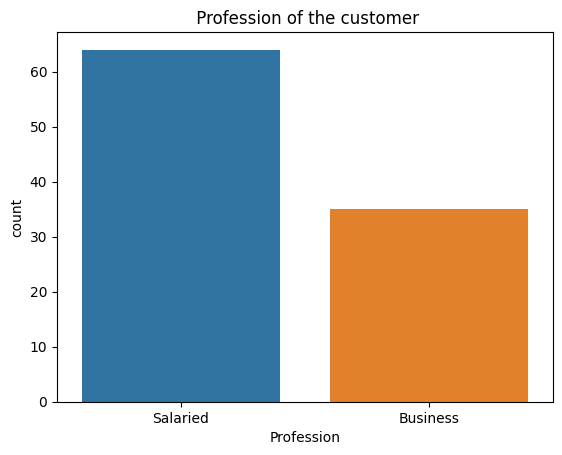

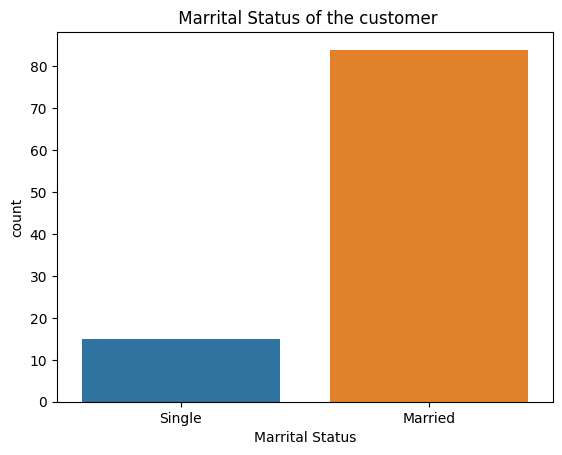

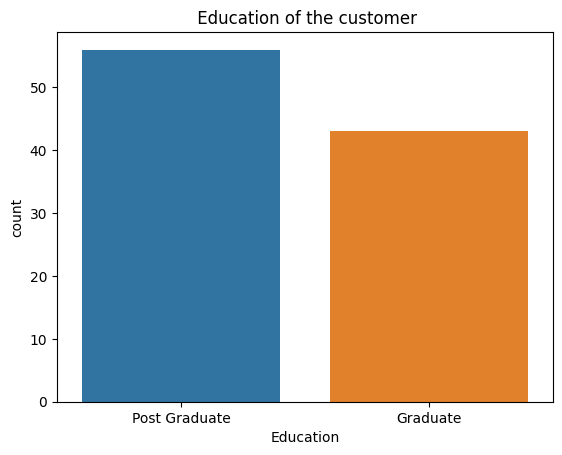

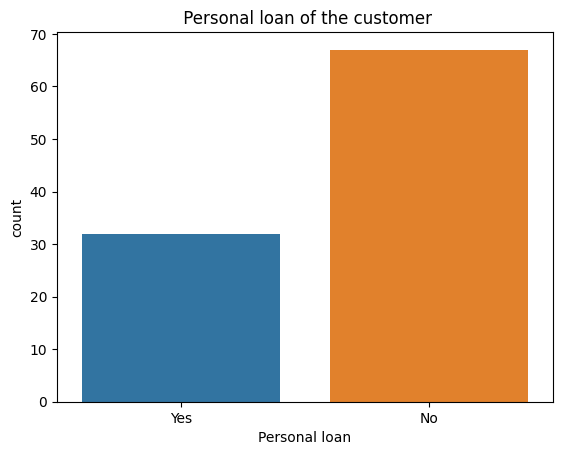

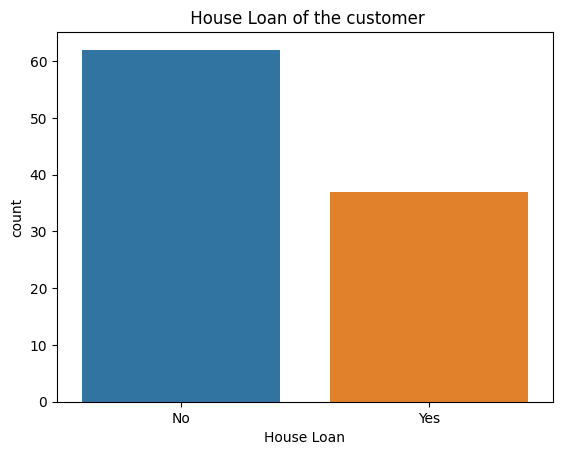

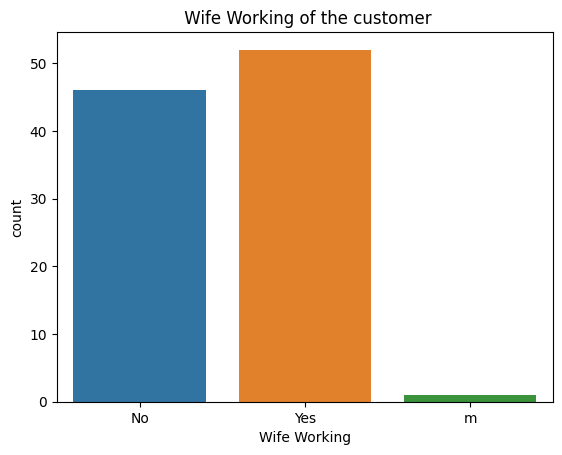

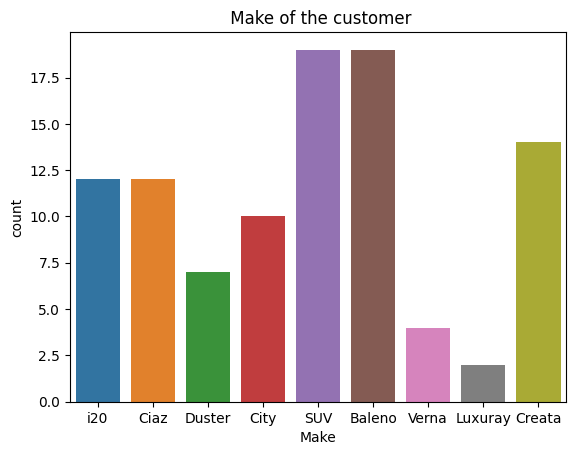

In [10]:
# value counts by categorical features
for i in categorical_features:
    sns.countplot(x=df14[i])
    plt.title(f' {i} of the customer')
    plt.show()

* from the above graph analysis most of the customers are salaried compared to business, others and almost all got married and mostly having higher education, they do not required loan for buying the vehicles and also their wives are working 

In [11]:
df14.rename(columns={'Personal loan':'Car loan','Price':'Ev price'},inplace=True)

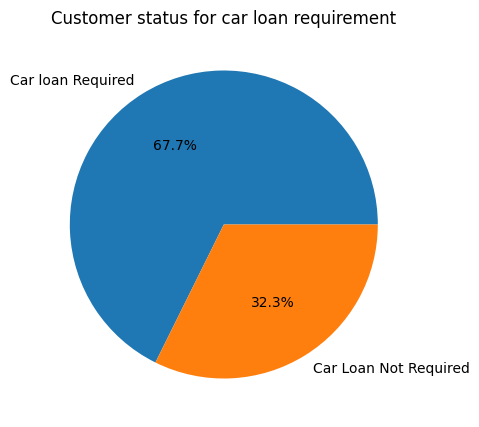

In [12]:
# pie chart gives the percent of total registered ev vehicles by state
plt.figure(figsize=(5,5))
plt.pie(df14['Car loan'].value_counts(),labels=['Car loan Required','Car Loan Not Required'],autopct='%1.1f%%')
plt.title('Customer status for car loan requirement')
plt.show()

This piechart shows 67.7% customers are not interested to take loan for buying car and only 32.3% customers they required loan for buying car

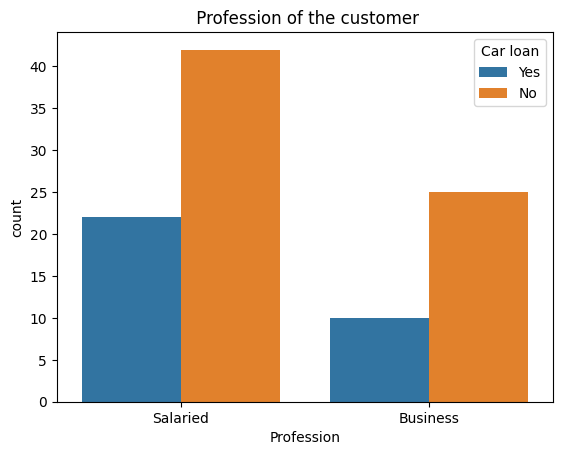

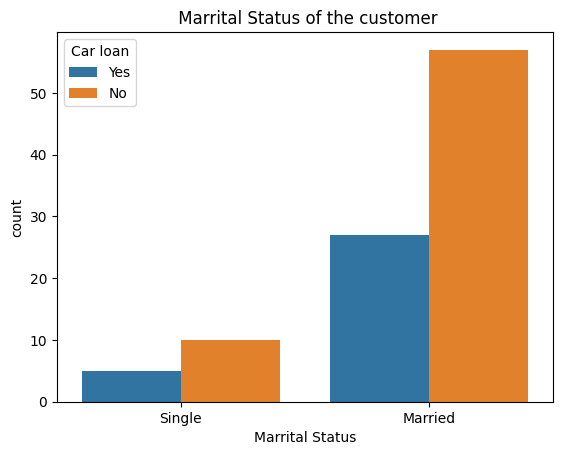

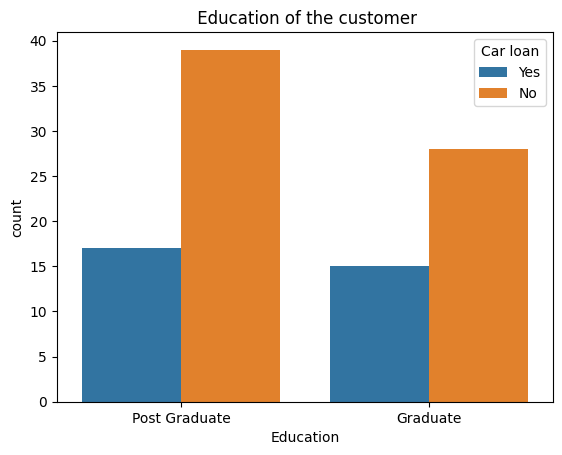

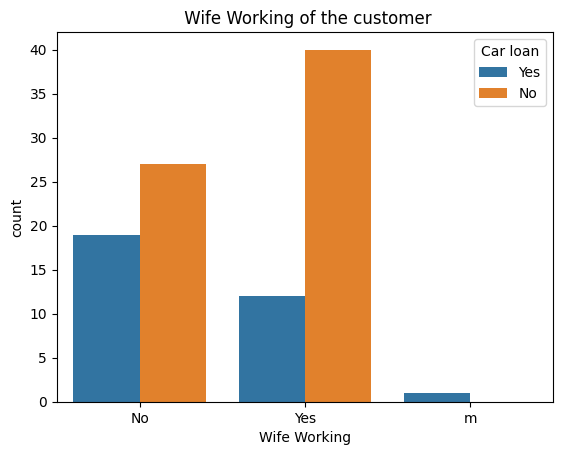

In [13]:
# based on profession who need car loan
features=['Profession','Marrital Status','Education','Wife Working']
for i in features:
    sns.countplot(x=df14[i],hue='Car loan',data=df14)
    plt.title(f' {i} of the customer')
    plt.show()

From the above charts we observe that most of the customers they do not required loan for buying vehicles by profession, Marrital status, Education and their wives wworking

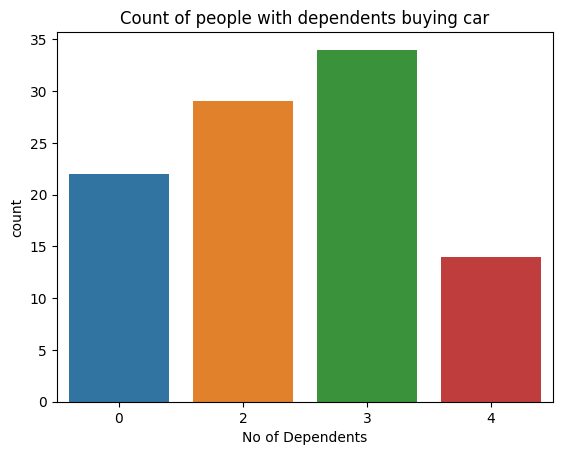

In [14]:
# count of people with dependents
sns.countplot(x='No of Dependents',data=df14)
plt.title('Count of people with dependents buying car')
plt.show()

From this graph most of the customers having more then 2 dependents (family size) to buying cars

In [15]:
# grouping the persions based on salary
SalaryGroup={}
length=df14.shape[0]
SalaryGroup['0-5lakh']=round(df14[(df14['Total Salary']>=100000)&(df14['Total Salary']<500000)].shape[0]*100/length,2)
SalaryGroup['5-15lakh']=round(df14[(df14['Total Salary']>=500000)&(df14['Total Salary']<1500000)].shape[0]*100/length,2)
SalaryGroup['15-25lakh']=round(df14[(df14['Total Salary']>=1500000)&(df14['Total Salary']<2500000)].shape[0]*100/length,2)
SalaryGroup['25-35lakh']=round(df14[(df14['Total Salary']>=2500000)&(df14['Total Salary']<3500000)].shape[0]*100/length,2)
SalaryGroup['35-45lakh']=round(df14[(df14['Total Salary']>=3500000)&(df14['Total Salary']<4500000)].shape[0]*100/length,2)
SalaryGroup['45-55lakh']=round(df14[(df14['Total Salary']>=4500000)&(df14['Total Salary']<5500000)].shape[0]*100/length,2)

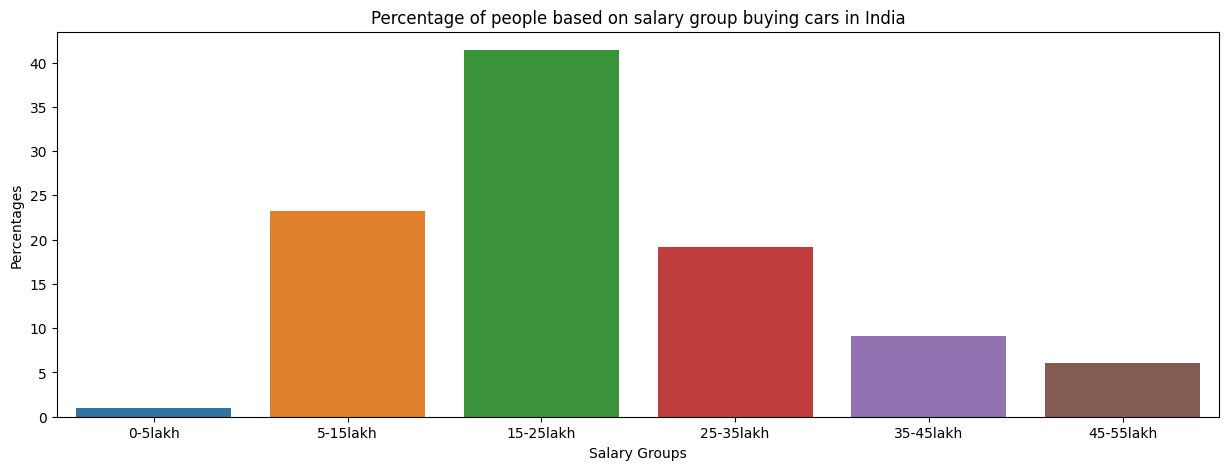

In [16]:
# percentage of peoples buying the cars based on the salary group
plt.figure(figsize=(15,5))
sns.barplot(x=list(SalaryGroup.keys()),y=list(SalaryGroup.values()))
plt.title('Percentage of people based on salary group buying cars in India')
plt.xlabel('Salary Groups')
plt.ylabel('Percentages')
plt.show()

From this mostly above 40% percent of the customers having the salary package is in between 15 - 25 Lakh

In [17]:
# grouping the persions based on the age groups
AgeGroup={}
length=df14.shape[0]
AgeGroup['25-30']=round(df14[(df14['Age']>=25)&(df14['Age']<30)].shape[0]*100/length,2)
AgeGroup['30-35']=round(df14[(df14['Age']>=30)&(df14['Age']<35)].shape[0]*100/length,2)
AgeGroup['35-40']=round(df14[(df14['Age']>=35)&(df14['Age']<40)].shape[0]*100/length,2)
AgeGroup['40-45']=round(df14[(df14['Age']>=40)&(df14['Age']<45)].shape[0]*100/length,2)
AgeGroup['45-50']=round(df14[(df14['Age']>=45)&(df14['Age']<50)].shape[0]*100/length,2)
AgeGroup['50-55']=round(df14[(df14['Age']>=50)&(df14['Age']<55)].shape[0]*100/length,2)

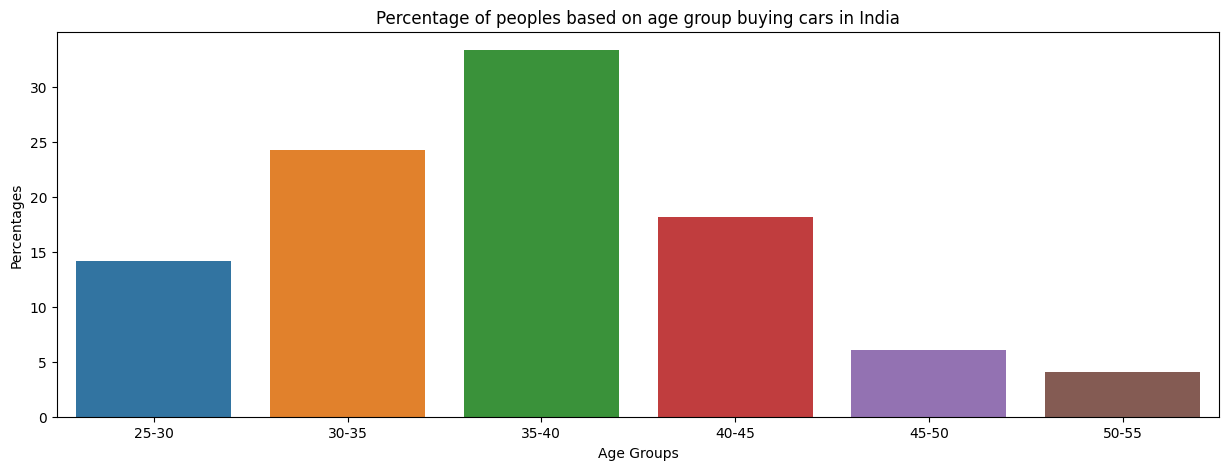

In [18]:
# visualizing the persions who buying the cars based on the age group
plt.figure(figsize=(15,5))
sns.barplot(x=list(AgeGroup.keys()),y=list(AgeGroup.values()))
plt.title('Percentage of peoples based on age group buying cars in India')
plt.xlabel('Age Groups')
plt.ylabel('Percentages')
plt.show()

In between 35 - 40 age group customers are interested to buiyng electric vehicles and then followed by 30 - 35 age group customers

In [19]:
# value counts of wife working
df14['Wife Working'].value_counts()

Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64

In [20]:
# removing the un necessary record
df14.drop(df14[df14['Wife Working'] == 'm'].index, inplace=True)

In [21]:
# shape of the dataset
df14.shape

(98, 13)

In [22]:
# deviding the numerical features based ont he data types
numerical =  df14.select_dtypes(include=['float64', 'int64'])

In [23]:
numerical

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Ev price
0,27,0,800000,0,800000,800000
1,35,2,1400000,600000,2000000,1000000
2,45,4,1800000,0,1800000,1200000
3,41,3,1600000,600000,2200000,1200000
4,31,2,1800000,800000,2600000,1600000
...,...,...,...,...,...,...
94,27,0,2400000,0,2400000,1600000
95,50,3,3800000,1300000,5100000,1600000
96,51,2,2200000,0,2200000,1100000
97,51,2,2700000,1300000,4000000,1500000


In [24]:
# applying the label encoding for categorical features
label_encoder = preprocessing.LabelEncoder()
categorical = df14.select_dtypes(include = ["object"])
for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [25]:
# concatenate the numerical and categorical data after encoding
X = pd.concat([numerical, categorical], axis=1)

In [26]:
# applying the pca analysis
pca_data = preprocessing.scale(X)
pca = PCA(n_components=12)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']
pf = pd.DataFrame(data=pc,columns=names)

In [27]:
pca.explained_variance_ratio_

array([8.32790708e-01, 1.27233463e-01, 3.99758288e-02, 1.07823620e-11,
       3.17409564e-12, 5.70074903e-13, 1.26308754e-13, 1.25460230e-13,
       8.59301321e-14, 4.84410030e-14, 3.05387680e-14, 1.53509961e-14])

In [28]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

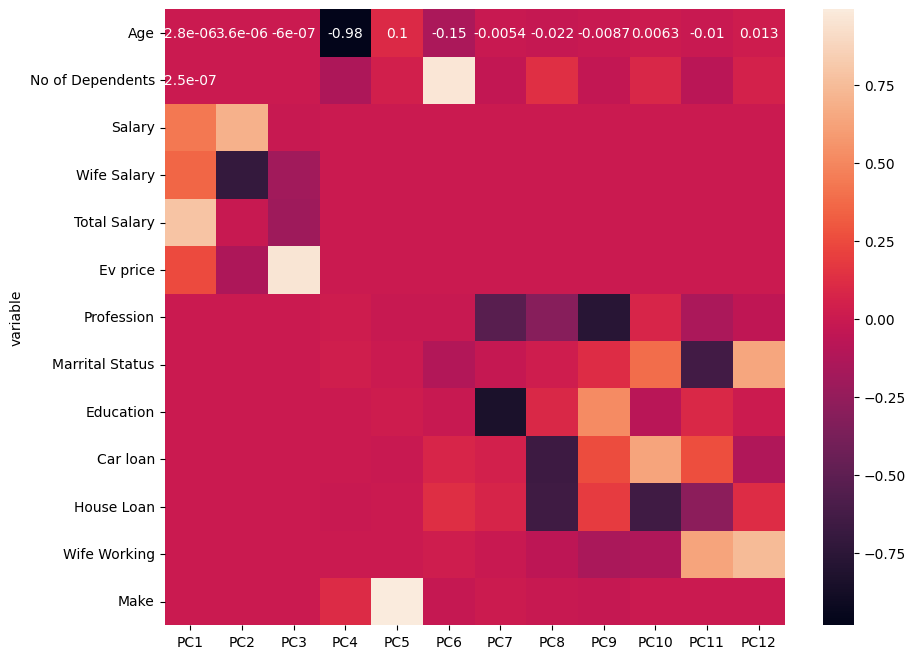

In [29]:
# Heat map for original variables and principal components
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

This heat map shows who are interested to buying vehicles based on their Profession, Educaton and Marrital Status 

In [30]:
# applying the kmeans clustering
wcss=[]
for k in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

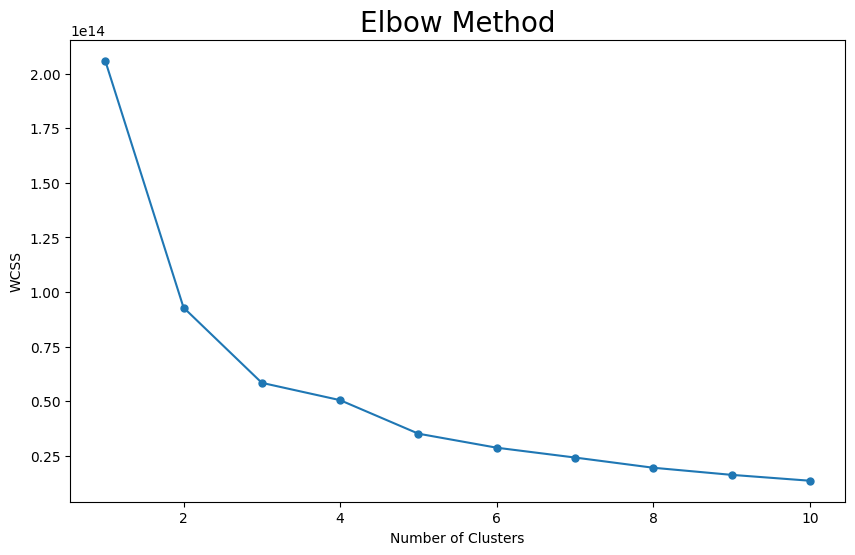

In [31]:
# findout the optimal number of clusters by using elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, linestyle='solid', marker='o',
          markersize=5)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

from the elbow curve method we observe there are 4 optimal number of clusters 

In [32]:
# after finding the optimal clusters apply
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[4.09500000e+01 2.65000000e+00 2.34000000e+06 1.16415322e-10
  2.34000000e+06 1.18000000e+06 6.00000000e-01 1.00000000e-01
  5.50000000e-01 5.00000000e-01 6.00000000e-01 0.00000000e+00
  3.40000000e+00]
 [3.19459459e+01 1.75675676e+00 1.17297297e+06 1.64864865e+05
  1.33783784e+06 8.57027027e+05 5.40540541e-01 3.51351351e-01
  5.67567568e-01 3.51351351e-01 2.70270270e-01 2.97297297e-01
  3.08108108e+00]
 [3.56153846e+01 2.15384615e+00 1.55769231e+06 8.84615385e+05
  2.44230769e+06 1.38846154e+06 7.30769231e-01 5.55111512e-17
  5.38461538e-01 1.92307692e-01 3.07692308e-01 1.00000000e+00
  3.88461538e+00]
 [4.22000000e+01 2.53333333e+00 2.65333333e+06 1.58666667e+06
  4.24000000e+06 1.74000000e+06 8.00000000e-01 0.00000000e+00
  6.66666667e-01 2.00000000e-01 4.00000000e-01 1.00000000e+00
  4.46666667e+00]]


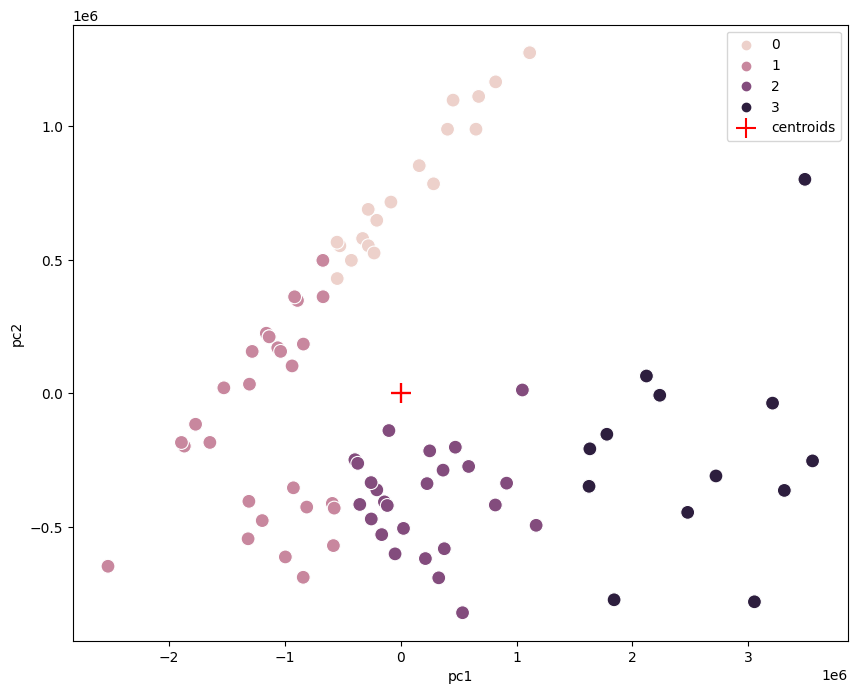

In [33]:
# Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_,s = 100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
          marker="+", c="r", s=200, label="centroids")
plt.legend()
plt.show()

This is the relation between pca1 and pca2

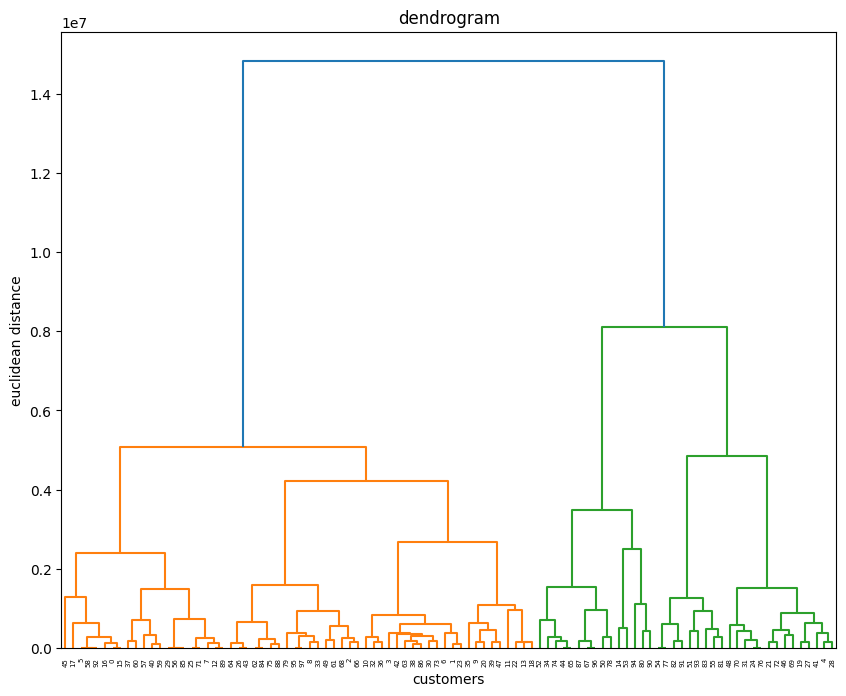

In [34]:
# applying the heirarchical clustering 
import scipy.cluster.hierarchy  as sch
data=sch.linkage(X,method='ward')
dendrogram=sch.dendrogram(data)
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

This dendrogram shows the optimal number of clusters

In [35]:
# clusters
df14['Clusters'] = X['cluster']

In [36]:
# cluster wise grouping
newdf = df14.groupby('Clusters')

In [37]:
newdf.get_group(0)

,Age,Profession,Marrital Status,Education,No of Dependents,Car loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Ev price,Clusters
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000,0
34,42,Salaried,Married,Graduate,4,Yes,Yes,No,2100000,0,2100000,Ciaz,1100000,0
50,49,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Duster,1300000,0
52,44,Salaried,Married,Post Graduate,4,No,No,No,2700000,0,2700000,SUV,1600000,0
55,41,Salaried,Married,Post Graduate,3,Yes,Yes,No,3100000,0,3100000,Creata,1500000,0
56,41,Salaried,Married,Graduate,3,No,No,No,2600000,0,2600000,Ciaz,1100000,0
62,31,Business,Single,Graduate,0,No,No,No,2000000,0,2000000,SUV,1500000,0
67,39,Salaried,Married,Post Graduate,2,No,No,No,1900000,0,1900000,City,1200000,0
76,36,Business,Married,Post Graduate,2,Yes,Yes,No,1900000,0,1900000,i20,800000,0


In [38]:
cluster0 = newdf.get_group(0)

In [39]:
cluster0.corr(numeric_only=True)

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Ev price,Clusters
Age,1.000000,0.494460,0.088948,NaN,0.088948,-0.125930,NaN
No of Dependents,0.494460,1.000000,-0.012653,NaN,-0.012653,-0.236870,NaN
Salary,0.088948,-0.012653,1.000000,NaN,1.000000,0.435612,NaN
Wife Salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Salary,0.088948,-0.012653,1.000000,NaN,1.000000,0.435612,NaN
Ev price,-0.125930,-0.236870,0.435612,NaN,0.435612,1.000000,NaN
Clusters,NaN,NaN,NaN,NaN,NaN,NaN,NaN


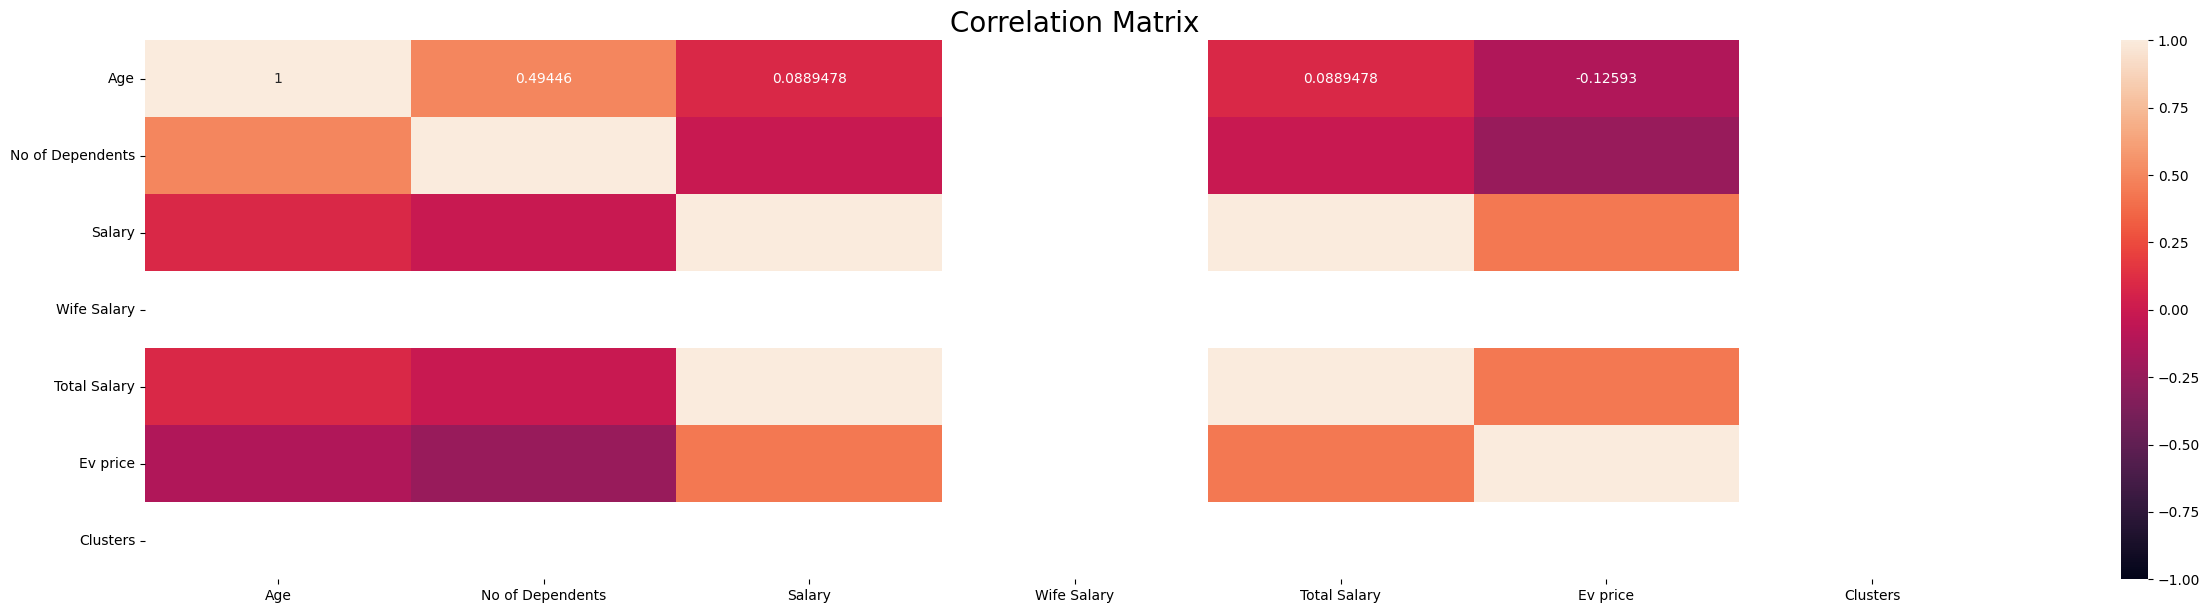

In [40]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7))
plt.title("Correlation Matrix", fontsize=20)

sns.heatmap(cluster0.corr(numeric_only=True),annot=True,vmax=1.0,vmin=-1.0,fmt='g')
plt.show()

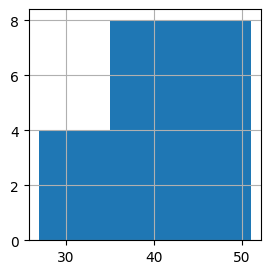

In [41]:
plt.figure(figsize=(3, 3))
hist = cluster0['Age'].hist(bins=3)
plt.show()

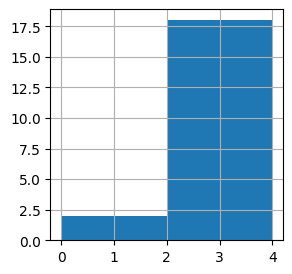

In [42]:
plt.figure(figsize=(3, 3))
hist = cluster0['No of Dependents'].hist(bins=2)
plt.show()

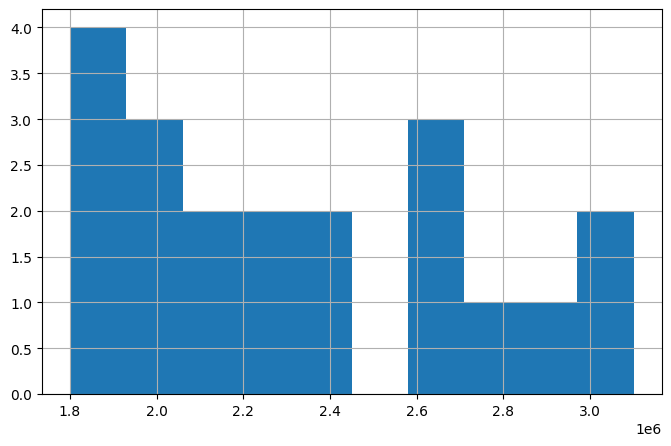

In [43]:
plt.figure(figsize=(8, 5))
hist = cluster0['Total Salary'].hist(bins=10)
plt.show()

From the above distribution plots we identify age group more than 35, family size dependents is greater than 2 are intersted to buying ev vehicles

### Geographic segmentation Analysis

In [44]:
# Load the dataset that related to geographic analysis
df1=pd.read_excel('D:/Downloads/state wide normal and ev vehicles with persentage.xlsx')
df1

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
0,1,Andaman & Nicobar Islands,160375,186,0.12
1,2,Andhra Pradesh,16517516,66500,0.40
2,3,Arunachal Pradesh,299371,25,0.01
3,4,Assam,5393542,116605,2.16
4,5,Bihar,11728184,155457,1.33
5,6,Chandigarh,843049,7628,0.90
6,7,Chhattisgarh,7431353,52813,0.71
7,8,Delhi,8457200,229305,2.71
8,9,Goa,1204110,12139,1.01
9,10,Gujarat,22799866,134273,0.59


In [45]:
# basic info about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sl No                               34 non-null     int64  
 1   State/UT                            34 non-null     object 
 2   Total Vehicles Registered           34 non-null     int64  
 3   Total Electric Vehicles Registered  34 non-null     int64  
 4   Percentage of Electric Vehicles     34 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [46]:
# this will gives you the detail summary
df1.describe()

,Sl No,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
count,34.000000,3.400000e+01,34.000000,34.000000
mean,17.500000,1.000025e+07,80706.441176,0.662941
std,9.958246,1.160720e+07,115981.864158,0.647272
min,1.000000,4.375700e+04,20.000000,0.010000
25%,9.250000,5.933925e+05,1489.000000,0.167500
50%,17.500000,6.225248e+06,41790.500000,0.515000
75%,25.750000,1.614329e+07,111040.250000,0.890000
max,34.000000,4.394323e+07,556629.000000,2.710000


In [47]:
# check the null values
df1.isnull().sum()

Sl No                                 0
State/UT                              0
Total Vehicles Registered             0
Total Electric Vehicles Registered    0
Percentage of Electric Vehicles       0
dtype: int64

In [48]:
# check the duplicated records
df1.duplicated().sum()

0

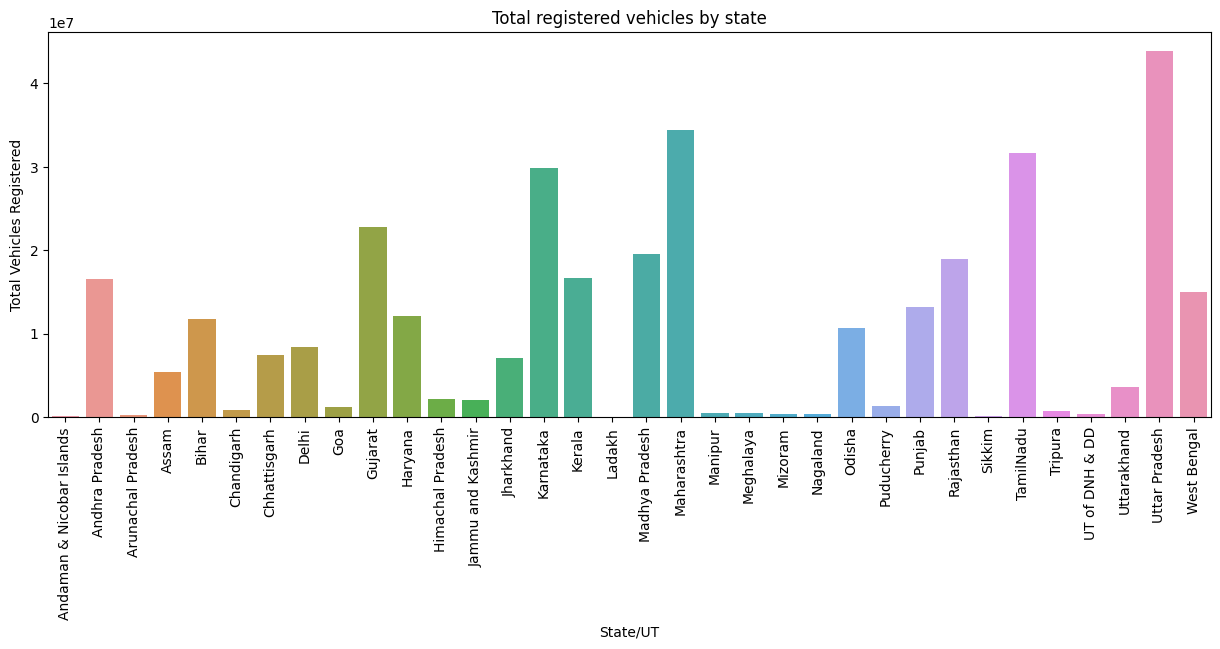

In [49]:
# this bar plot gives you the state wide total registered vehicles
plt.figure(figsize=(15,5))
sns.barplot(x=df1['State/UT'],y=df1['Total Vehicles Registered'])
plt.title('Total registered vehicles by state')
plt.xticks(rotation=90)
plt.show()

This graph showcased Uttar Pradesh having the maximum of total registered vehicles and Andaman & Nicobar Islands, Sikkim having the lowest registered vehicles

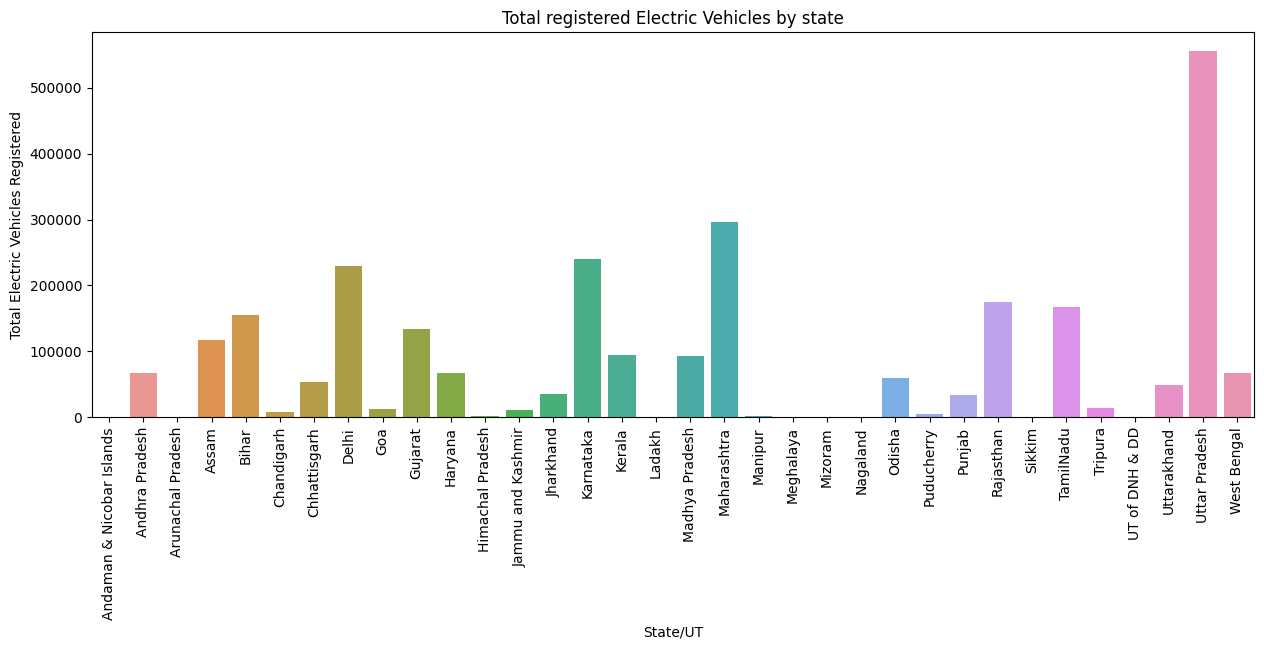

In [50]:
# this plot gives the state wide total ev registered vehicles
plt.figure(figsize=(15,5))
sns.barplot(x=df1['State/UT'],y=df1['Total Electric Vehicles Registered'])
plt.title('Total registered Electric Vehicles by state')
plt.xticks(rotation=90)
plt.show()

This graph showcased Uttar Pradesh having the maximum of total electric vehicles registered and Andaman & Nicobar Islands, Sikkim, Arunachal Pradesh and some other states having the lowest total registered electric registered vehicles

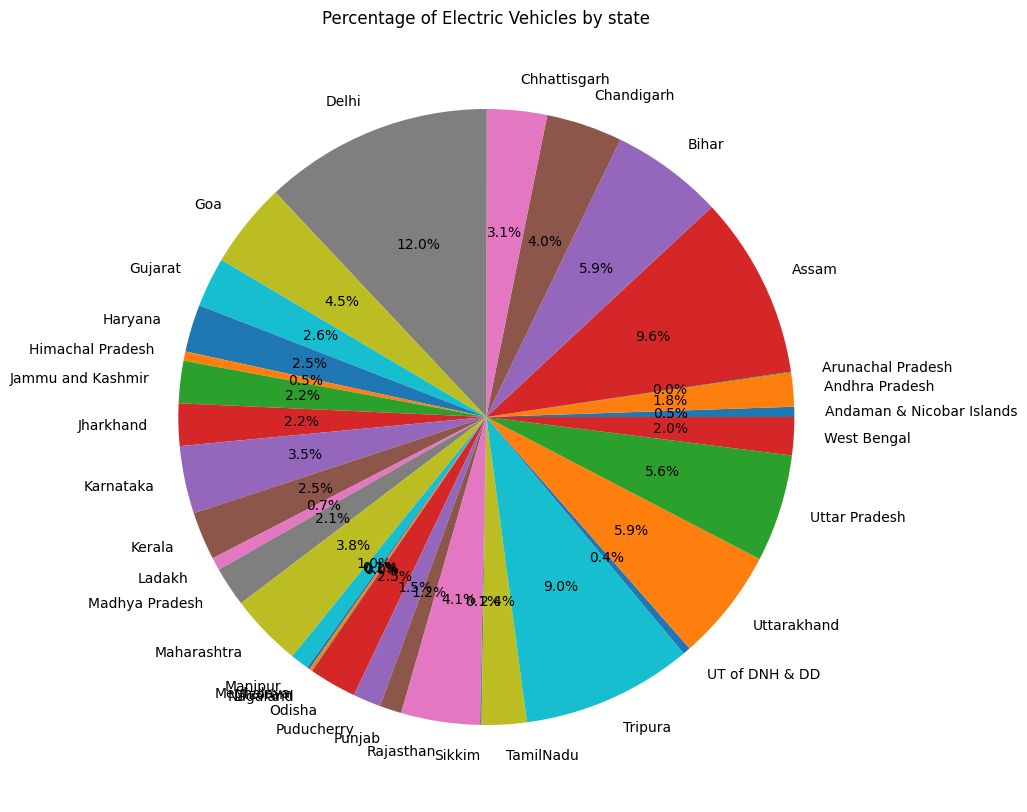

In [51]:
# pie chart gives the percent of total registered ev vehicles by state
plt.figure(figsize=(15,10))
plt.pie(df1['Percentage of Electric Vehicles'],labels=df1['State/UT'],autopct='%1.1f%%')
plt.title('Percentage of Electric Vehicles by state')
plt.show()

This piechart shows percentage of which state having the maximum electric vehicles from this Delhi has the 12.0% share

#### Electric Vehicle sales by statewide with charging stations

In [ ]:
# load the dataset
df2=pd.read_csv('D:/Downloads/ev sales by statewide with charging stations.csv')
df2

The above dataset having the features such as States, different types of vehicles and total charging stations based on the dataset we are analyse how many Two wheeler, Three wheeler, Four wheeler and other whehicles are sold by state

In [53]:
# basic info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     float64
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     float64
 6   Public Service Vehicle          32 non-null     float64
 7   Special Category Vehicles       32 non-null     float64
 8   Ambulance/Hearses               32 non-null     float64
 9   Construction Equipment Vehicle  32 non-null     float64
 10  Other                           32 non-null     float64
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations         24 non

In [54]:
# see the columns of the dataset
df2.columns

Index(['Unnamed: 0', 'State Name', 'Two Wheeler', 'Three Wheeler',
       'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
       'Special Category Vehicles', 'Ambulance/Hearses',
       'Construction Equipment Vehicle', 'Other', 'Grand Total',
       'total-charging-stations'],
      dtype='object')

In [55]:
# remove the un-neccesary features
df2.drop(columns=['Unnamed: 0'],inplace=True)

In [56]:
# check the null values
df2.isnull().sum()

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64

In [57]:
# replace the null values with specified value
df2['total-charging-stations']=df2['total-charging-stations'].replace(np.nan,0)

In [58]:
# differenciate the features based on the data type
continuous_features=[]
for i in df2.columns:
    if df2[i].dtypes=='float64':
        continuous_features.append(i)
print('continuous features: ',continuous_features)

continuous features:  ['Three Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'total-charging-stations']


In [59]:
# convert the wrong datatype to correct datatype
for i in continuous_features:
    df2[i]=df2[i].astype('int64')

In [60]:
df2

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30,81,0,40,0,0,0,7,159,0
1,Arunachal Pradesh,14,0,5,0,0,0,0,0,1,20,0
2,Assam,721,47041,161,7,15,0,0,0,2,47947,10
3,Bihar,5003,59079,114,11,26,0,0,0,8,64241,9
4,Chandigarh,298,1410,182,0,40,0,0,0,1,1931,2
5,Chhattisgarh,6424,5341,117,1077,1,0,0,368,100,13428,18
6,Delhi,14730,112831,3051,49,39,0,0,0,1602,132302,179
7,Goa,1314,28,289,13,36,2,0,0,4,1686,8
8,Gujarat,13662,1869,1309,28,278,344,0,26,77,17593,78
9,Haryana,7777,18595,186,122,8,2,0,0,90,26780,62


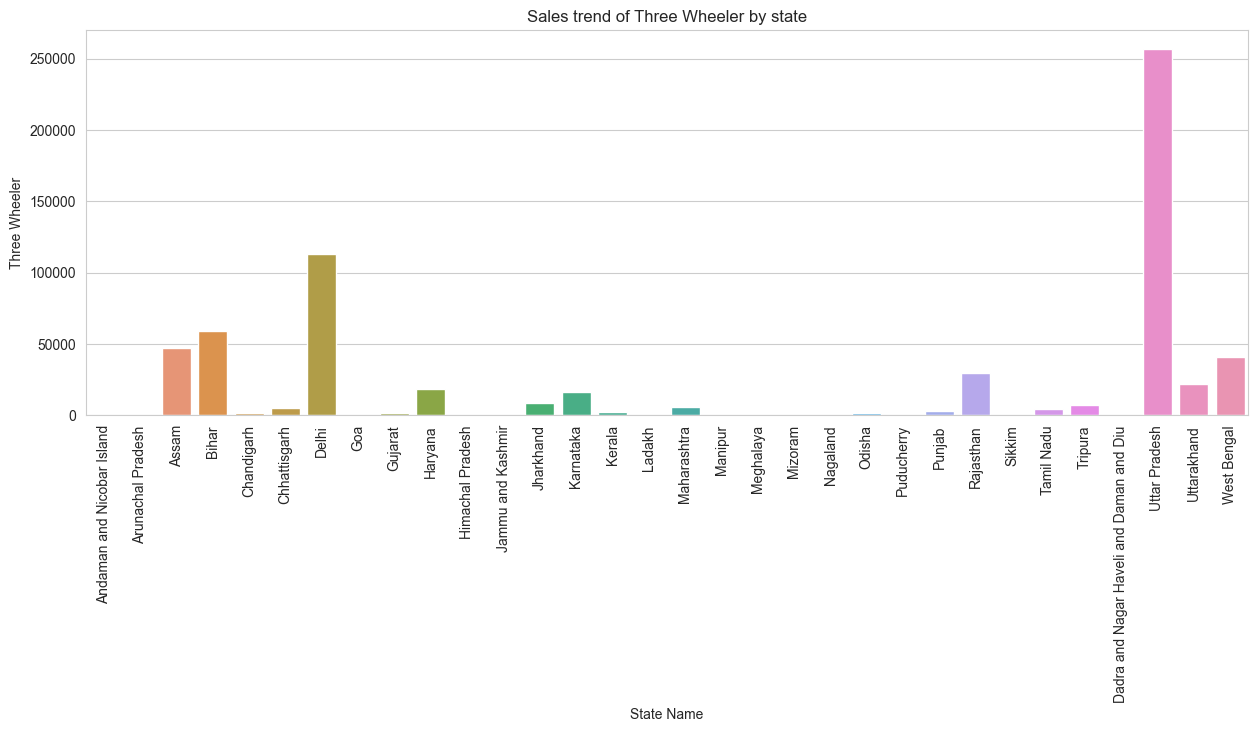

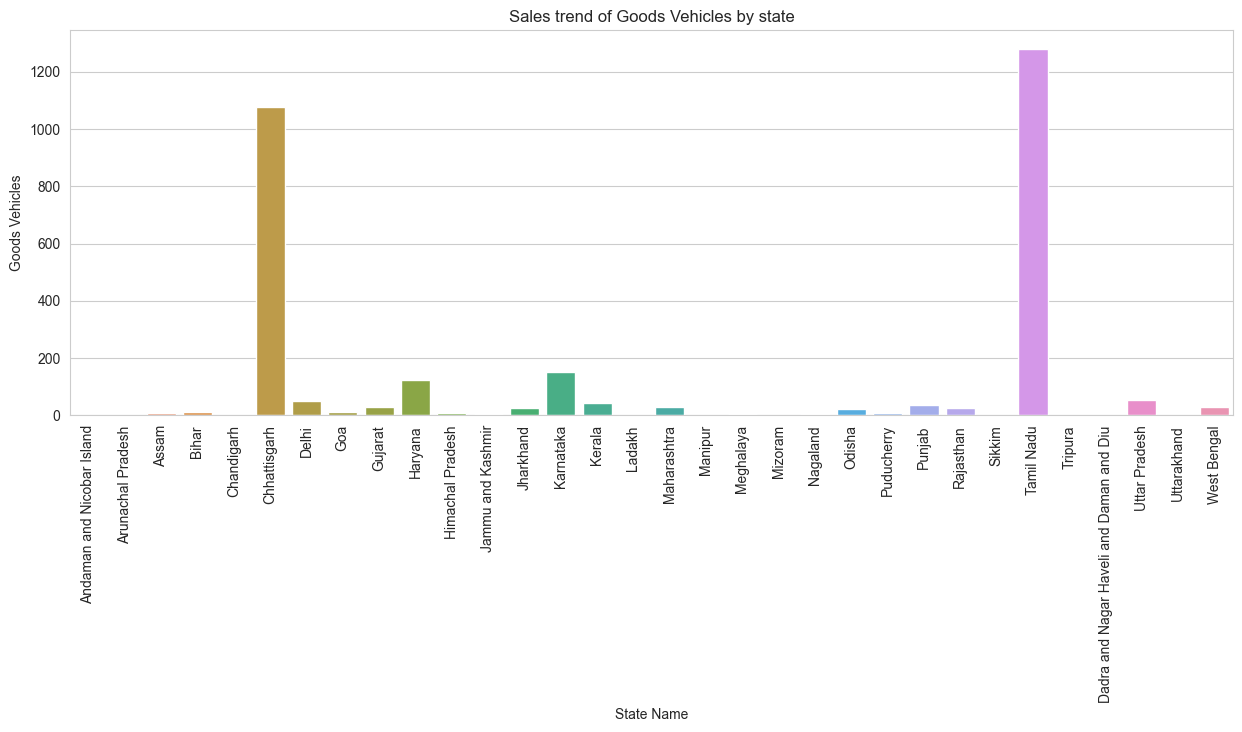

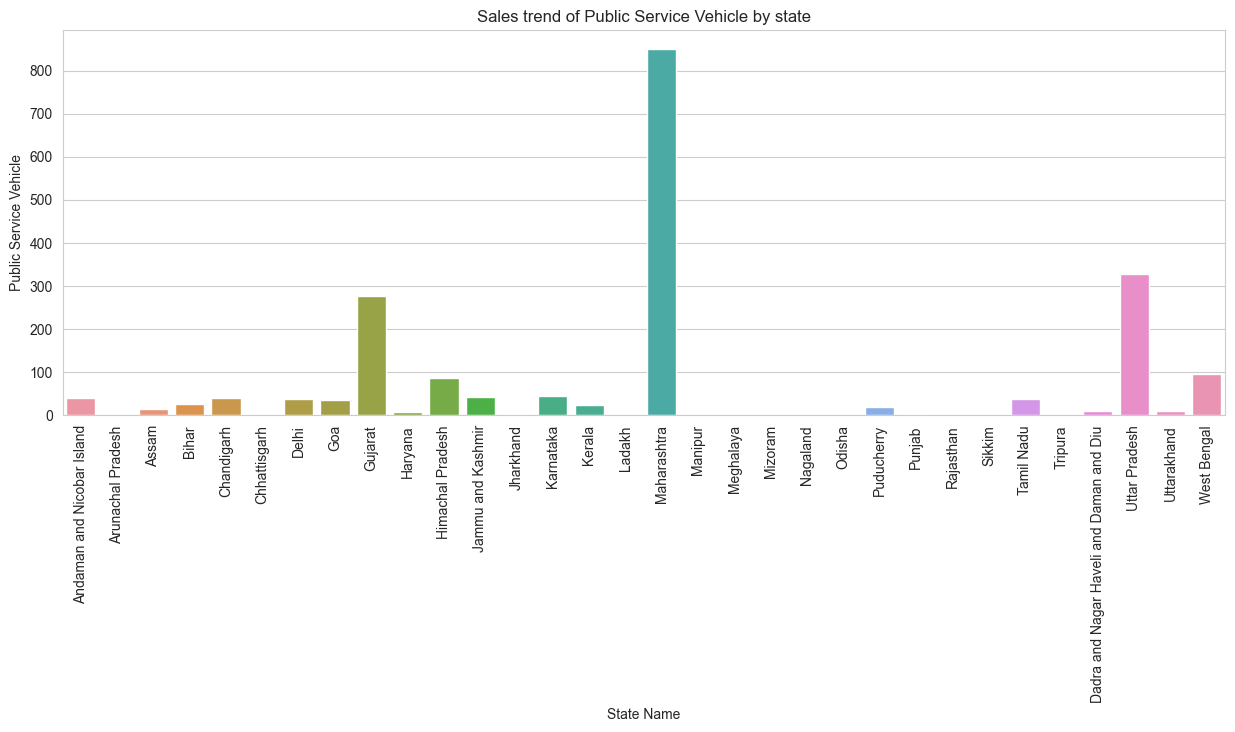

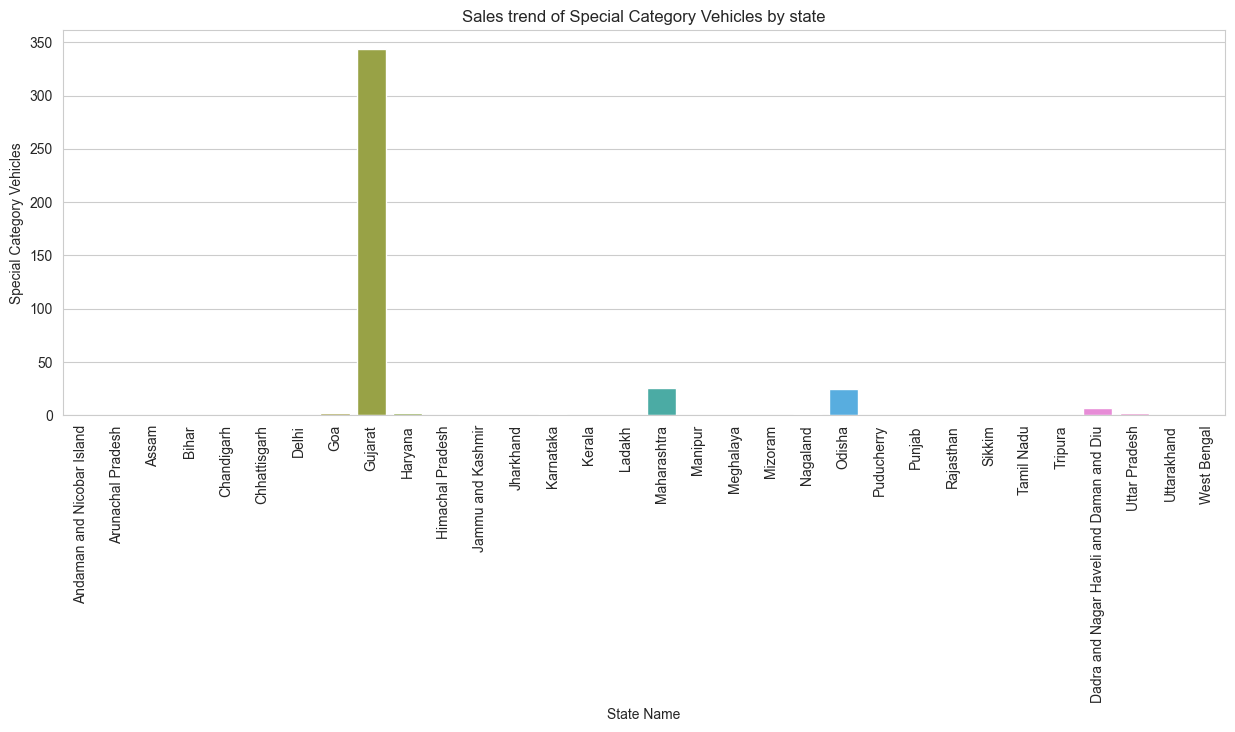

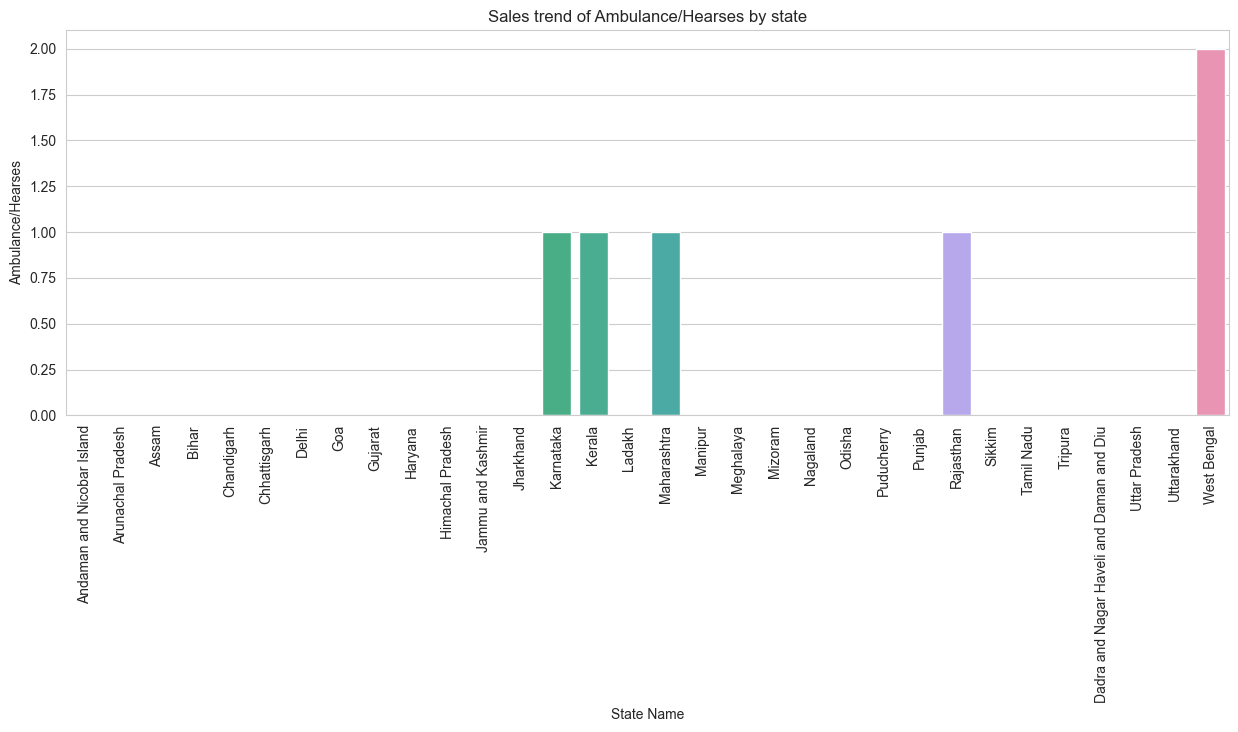

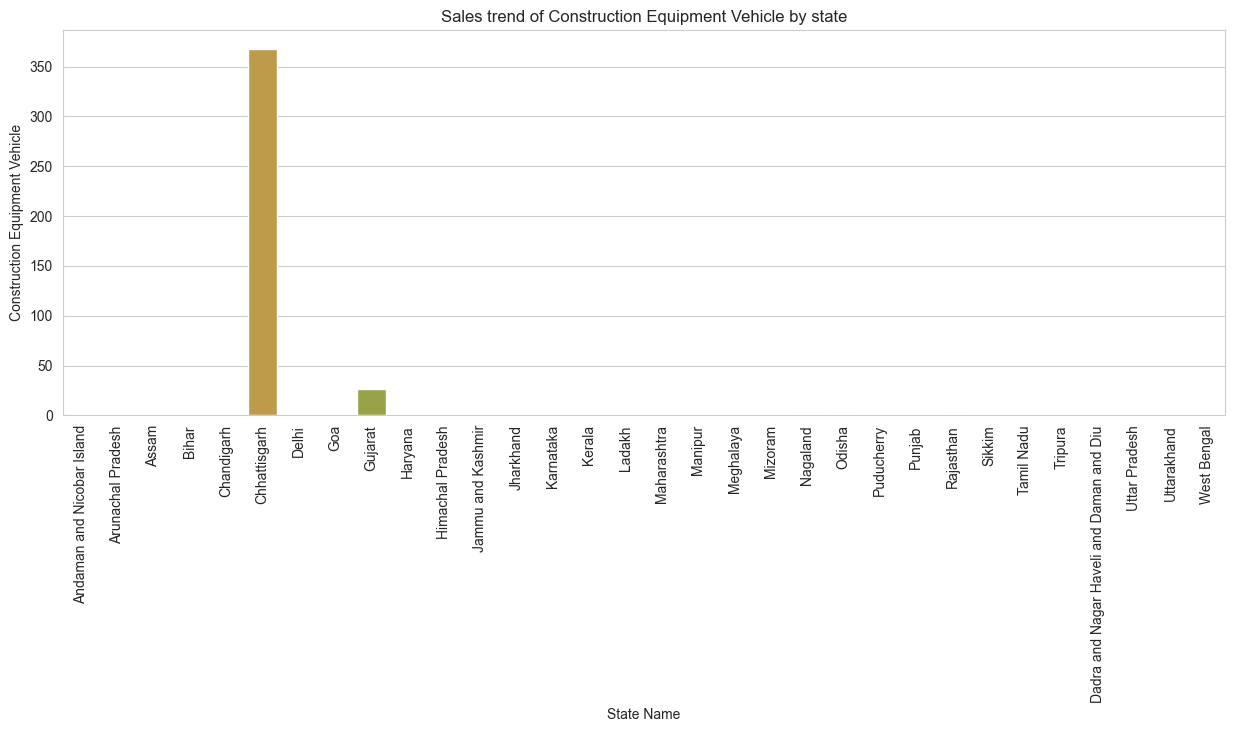

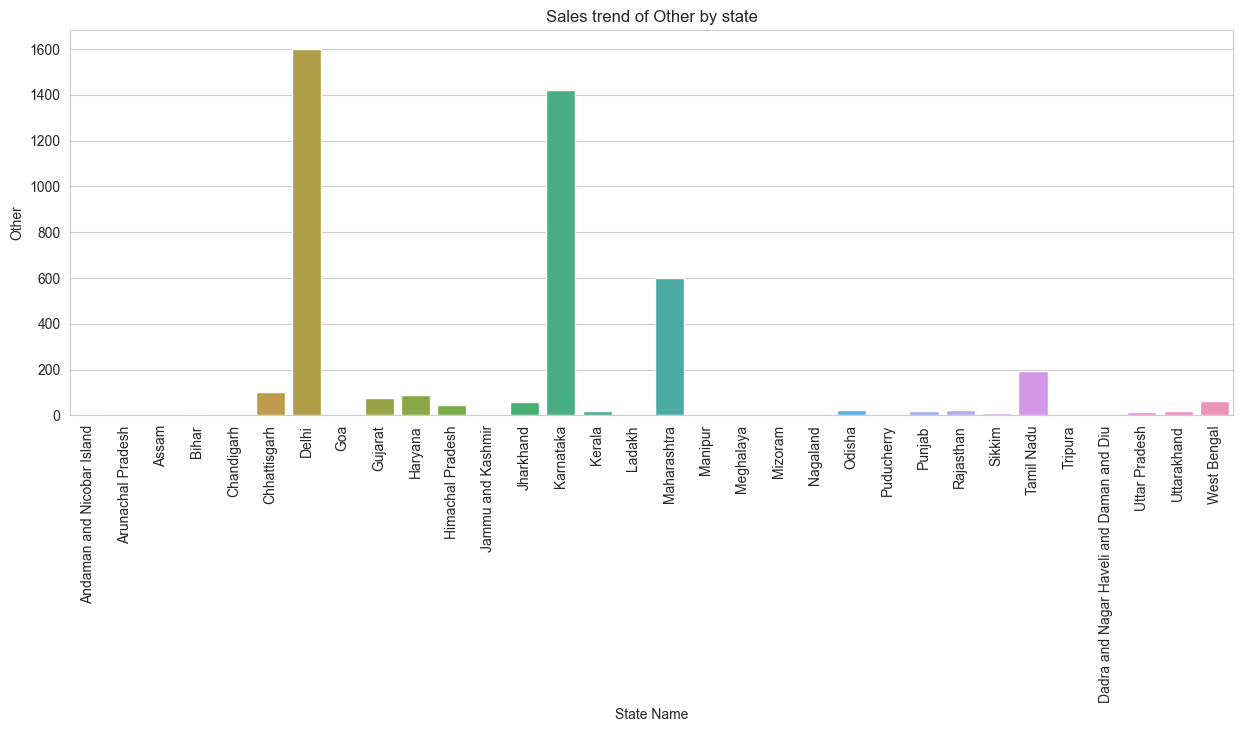

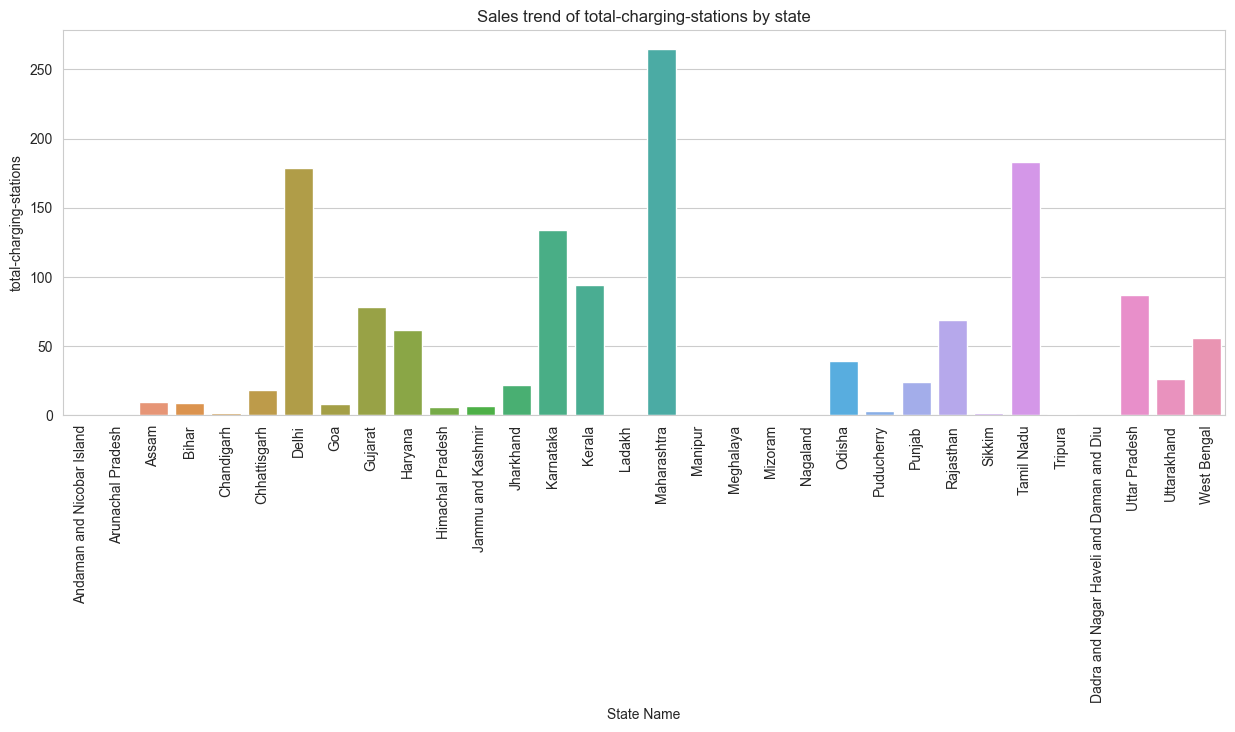

In [61]:
#this plot shows different type of electric vehicles by state
for i in continuous_features:
    plt.figure(figsize=(15,5))
    sns.set_style('whitegrid')
    sns.barplot(x=df2['State Name'],y=df2[i])
    plt.title(f'Sales trend of {i} by state')
    plt.xticks(rotation=90)
    plt.show()

This delved maximum of three wheeler vehicles are sold at Uttar Pradesh and maximum of Goods vehivles are sold at Tamilnadu, Public service vehivles at Maharashtra, Special category vehicles at Gujarat, maximum of Ambulances are sold at West Bengal and maximum construction equipment vehicles are sold at Chhattishgarh, Orhe vehicles sold at Delhi

#### Electric vehicle stations sanctioned at highways dataset

In [ ]:
# load the electric vehicle charging stattions sanctioned on Expressways/Highways dataset
df3=pd.read_csv('D:/Downloads/ev stations sanctioned at highways.csv',encoding='cp1252')
df3

In [63]:
# basic information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           26 non-null     object
 1   Category                         26 non-null     object
 2   Expressways/Highways             26 non-null     object
 3   EV Charging Stations Sanctioned  26 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 964.0+ bytes


In [64]:
# columns of the dataset
df3.columns

Index(['Sl. No', 'Category', 'Expressways/Highways',
       'EV Charging Stations Sanctioned'],
      dtype='object')

In [65]:
# check the null values
df3.isnull().sum()

Sl. No                             0
Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64

In [66]:
# check the duplicated records
df3.duplicated().sum()

0

In [67]:
# drop the grand total record tha is not necessary
df3.drop(df3.tail(1).index,inplace=True)
df3.drop(columns=['Sl. No'],inplace=True)

In [68]:
# this dataset having binary catogery and separate the category by using groupby
Expressways=df3.groupby('Category').get_group('Expressways')
Expressways

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30
5,Expressways,Surat-Mumbai,30
6,Expressways,Agra-Lucknow,40
7,Expressways,Eastern Peripheral (A),14
8,Expressways,Hyderabad ORR,16


In [69]:
# rename the Expressways/Highways feature
Expressways.rename(columns={'Expressways/Highways':'Expressways'},inplace=True)
Expressways.drop(columns=['Category'],inplace=True)

In [70]:
# sort the values by EV Charging Stations Sanctioned
Expressways.sort_values(by='EV Charging Stations Sanctioned',ascending=False)

,Expressways,EV Charging Stations Sanctioned
6,Agra-Lucknow,40
4,Bangaluru-Chennai,30
5,Surat-Mumbai,30
2,Delhi Agra Yamuna,20
8,Hyderabad ORR,16
3,Bengaluru Mysore,14
7,Eastern Peripheral (A),14
0,Mumbai - Pune,10
1,Ahmadabad - Vadodara,10


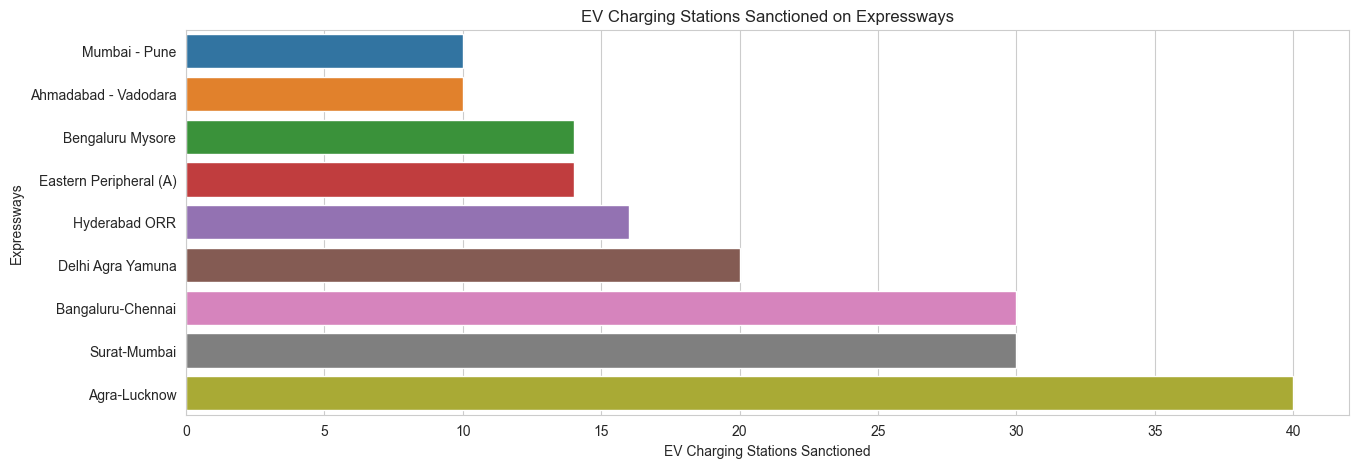

In [71]:
# plot the EV Charging Stations Sanctioned on Expressways
plt.figure(figsize=(15,5))
plot=Expressways.sort_values(by='EV Charging Stations Sanctioned',ascending=True)
sns.barplot(y='Expressways',x='EV Charging Stations Sanctioned',data=plot)
plt.title('EV Charging Stations Sanctioned on Expressways')
plt.show()

This bar chart showcased Agra - Lucknow expressway having the highest charging stations

In [72]:
# grouping the highway data
Highways=df3.groupby('Category').get_group('Highways')
Highways

,Category,Expressways/Highways,EV Charging Stations Sanctioned
9,Highways,Delhi - Srinagar,80
10,Highways,Delhi – Kolkata,160
11,Highways,Agra - Nagpur,80
12,Highways,Meerut to Gangotri Dham,44
13,Highways,Mumbai - Delhi,124
14,Highways,Mumbai-Panaji,60
15,Highways,Mumbai - Nagpur,70
16,Highways,Mumbai - Bengaluru,100
17,Highways,Kolkata - Bhubaneswar,44
18,Highways,Kolkata - Nagpur,120


In [73]:
# rename the columns, drop the un important features
Highways.rename(columns={'Expressways/Highways':'Highways'},inplace=True)
Highways.drop(columns=['Category'],inplace=True)

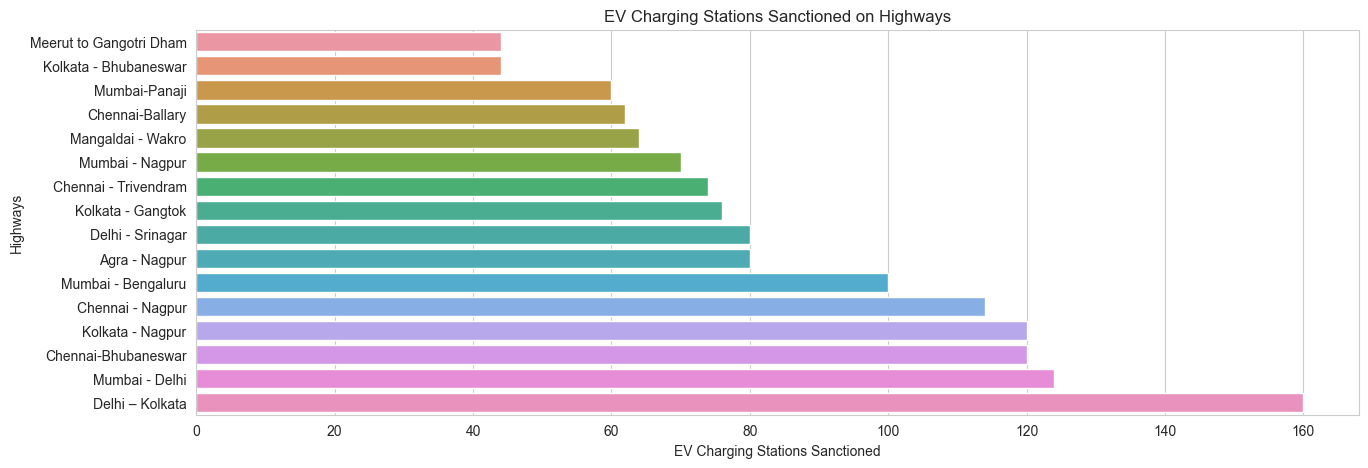

In [74]:
# plot the EV Charging Stations Sanctioned on Highways
plt.figure(figsize=(15,5))
plot=Highways.sort_values(by='EV Charging Stations Sanctioned',ascending=True)
sns.barplot(y='Highways',x='EV Charging Stations Sanctioned',data=plot)
plt.title('EV Charging Stations Sanctioned on Highways')
plt.show()

This bar chart showcased Delhi - Kolkata highway having the highest charging stations

In [75]:
# load the State wide ev stations sanctioned dataset
df4=pd.read_csv('D:/Downloads/State wide ev stations sanctioned.csv')
df4

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [76]:
# basic information
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   State/UT                                          26 non-null     object
 1   No. of Electric Vehicle (EV) Chargers Sanctioned  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


In [77]:
# check the columns
df4.columns

Index(['State/UT', 'No. of Electric Vehicle (EV) Chargers Sanctioned'], dtype='object')

In [78]:
# drop the grand total records
df4.drop(df4.tail(1).index,inplace=True)

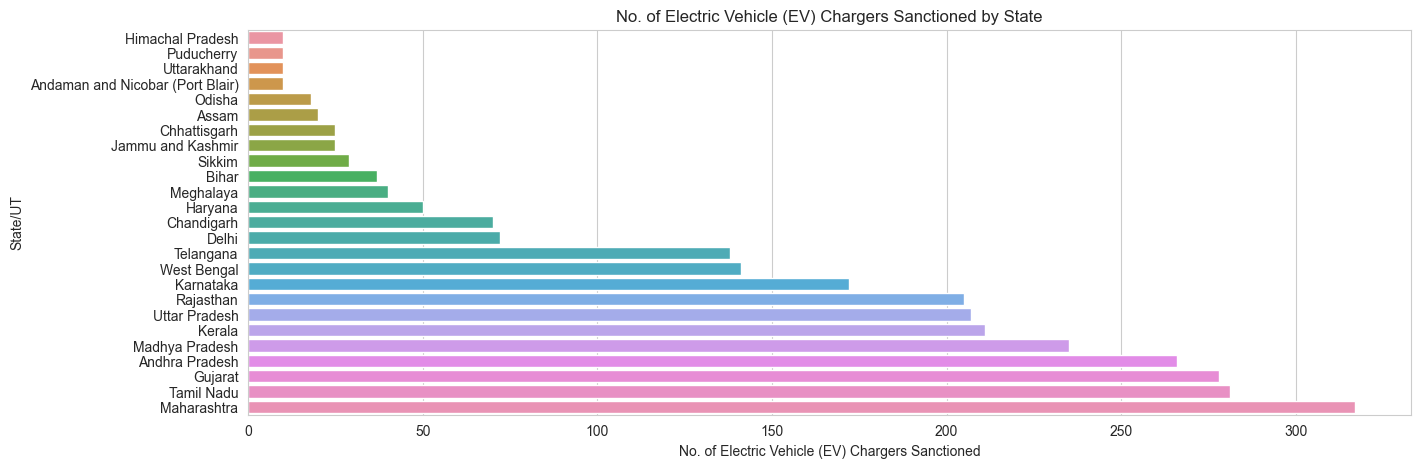

In [79]:
# plot the No. of Electric Vehicle (EV) Chargers Sanctioned by State
plt.figure(figsize=(15,5))
plot=df4.sort_values(by='No. of Electric Vehicle (EV) Chargers Sanctioned',ascending=True)
sns.barplot(y='State/UT',x='No. of Electric Vehicle (EV) Chargers Sanctioned',data=plot)
plt.title('No. of Electric Vehicle (EV) Chargers Sanctioned by State')
plt.show()

This shows Maharashtra having the having the maximum of EV charging stations sanctioned

### Electric Vehicle sales dataset

In [80]:
# load the Electric Vehicles sales dataset
df5=pd.read_excel('D:/Downloads/Ev Sales.xlsx')
df5

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048


In [81]:
# check the basic information
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [82]:
# see the columns
df5.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

In [83]:
# check the null values
df5.isnull().sum()

YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64

In [84]:
# check the duplicated records
df5.duplicated().sum()

0

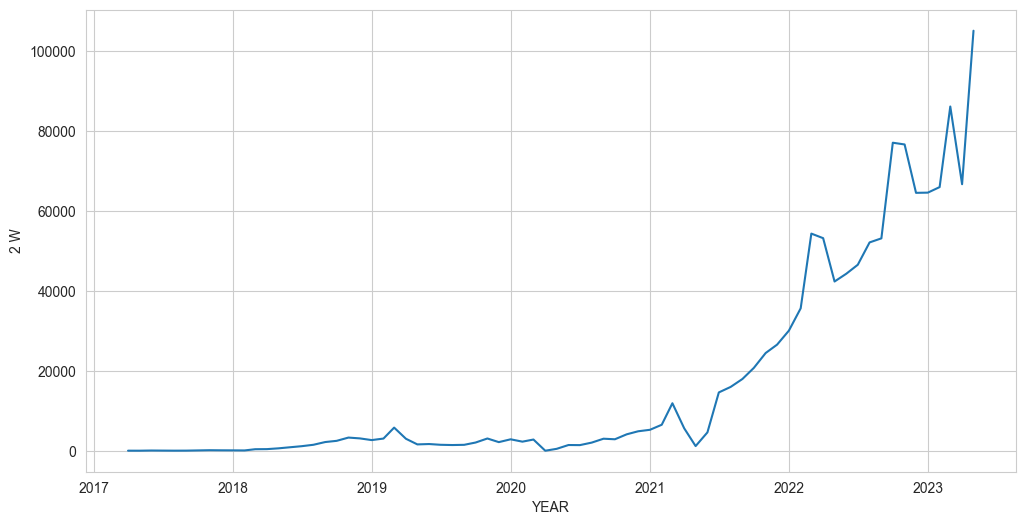

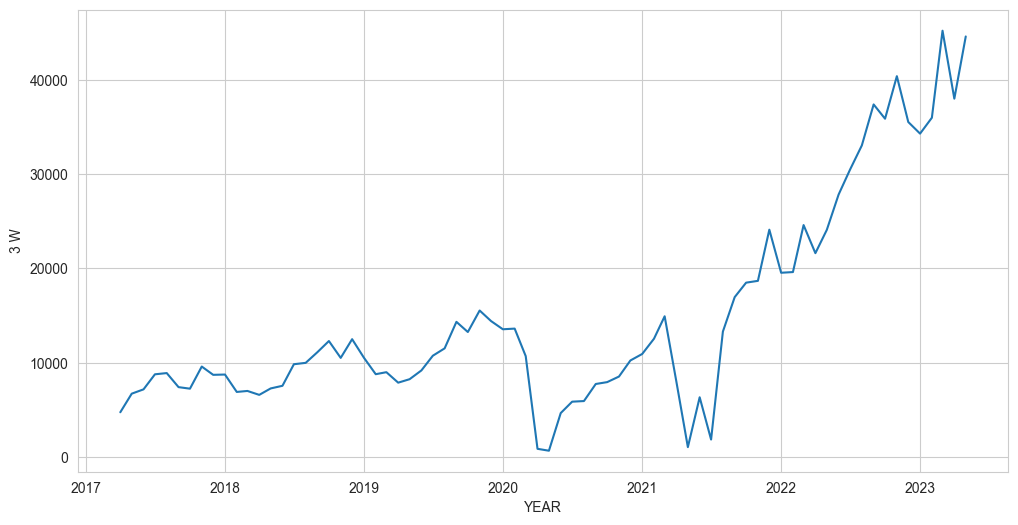

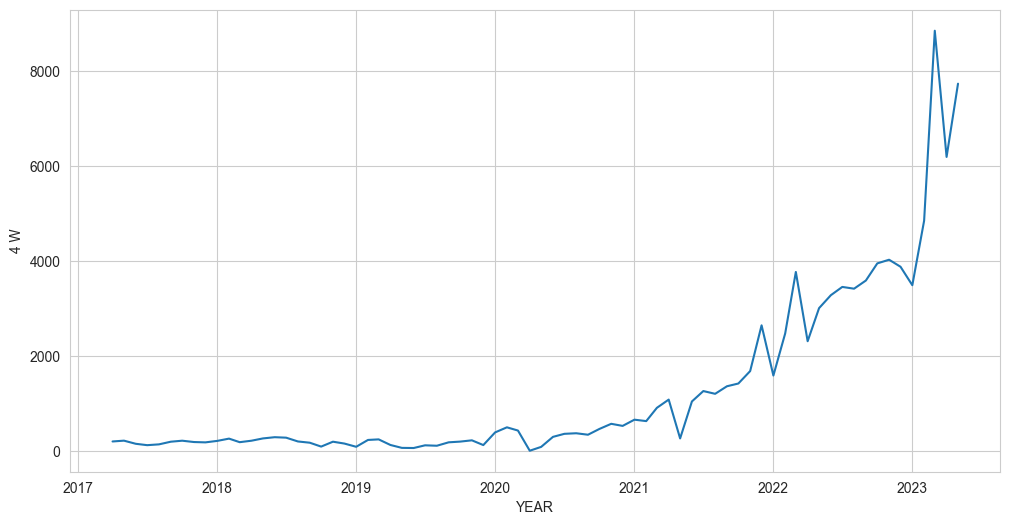

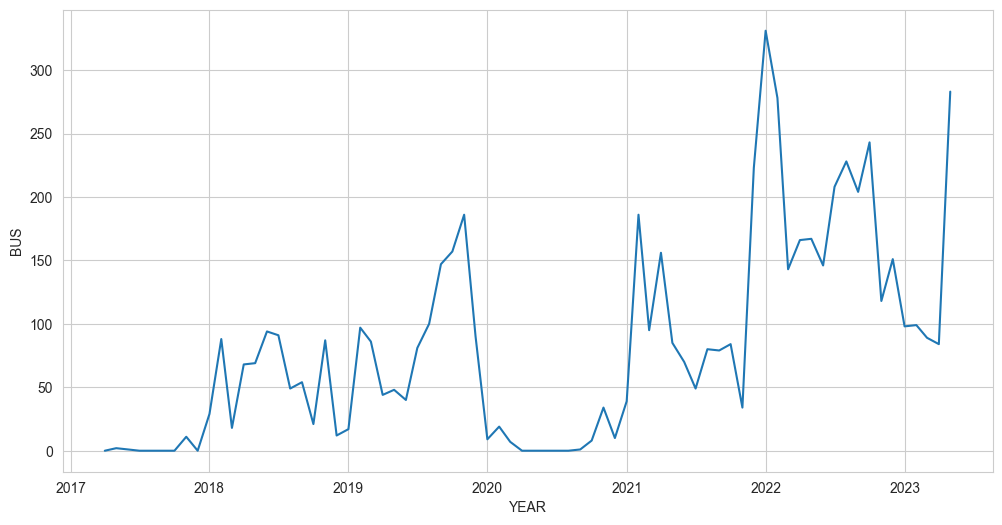

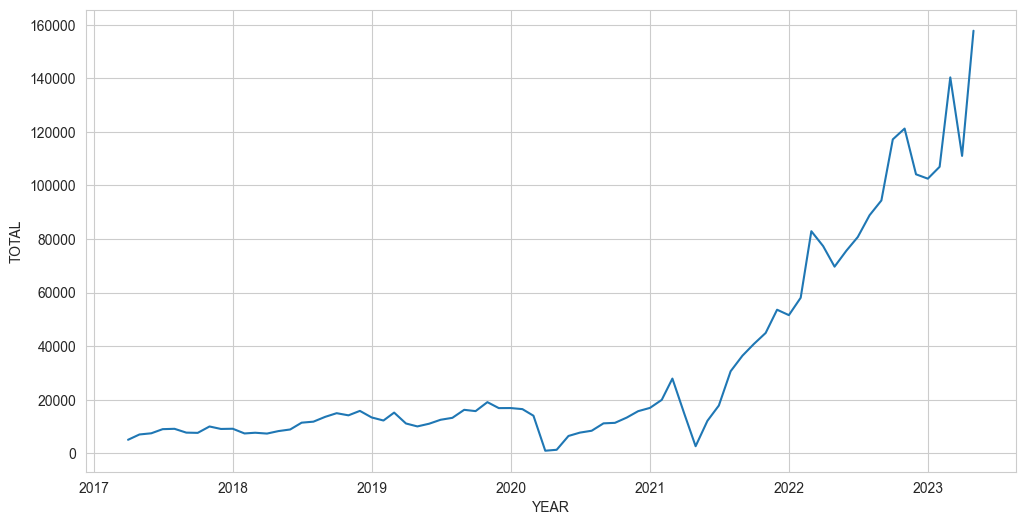

In [85]:
# this plots shows the different ev vehicles sales trend by year
for i in df5.columns:
    if df5[i].dtypes=='int64':
        plt.figure(figsize=(12,6))
        sns.lineplot(x='YEAR',y=i,data=df5)
        plt.show()

The above time series data trends showcased the Two wheeler, three wheeler and four wheeler electric vehicles having the drastically increases i n sales from 2019 -2023

### Two wheeler EV vehicles sales in india dataset

In [86]:
# load the India EV 2W Sales Data set on FY2019_2020
df6=pd.read_excel('D:/Downloads/India EV 2W Sales Data.xlsx',sheet_name='FY2019_2020')

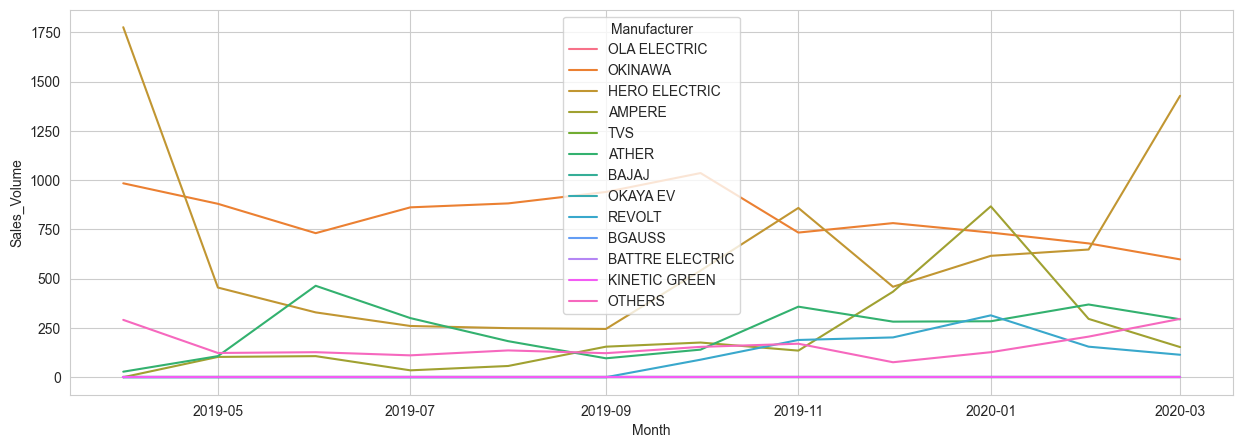

In [87]:
#shows the different brands sales trends in FY2019_2020
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Sales_Volume',hue='Manufacturer',data=df6)
plt.show()

From this graph Hero Elecctric two wheeler are solded in the year of 2019 to 2020

In [88]:
# load the India EV 2W Sales Data set on FY2020_2021
df7=pd.read_excel('D:/Downloads/India EV 2W Sales Data.xlsx',sheet_name='FY2020_2021')

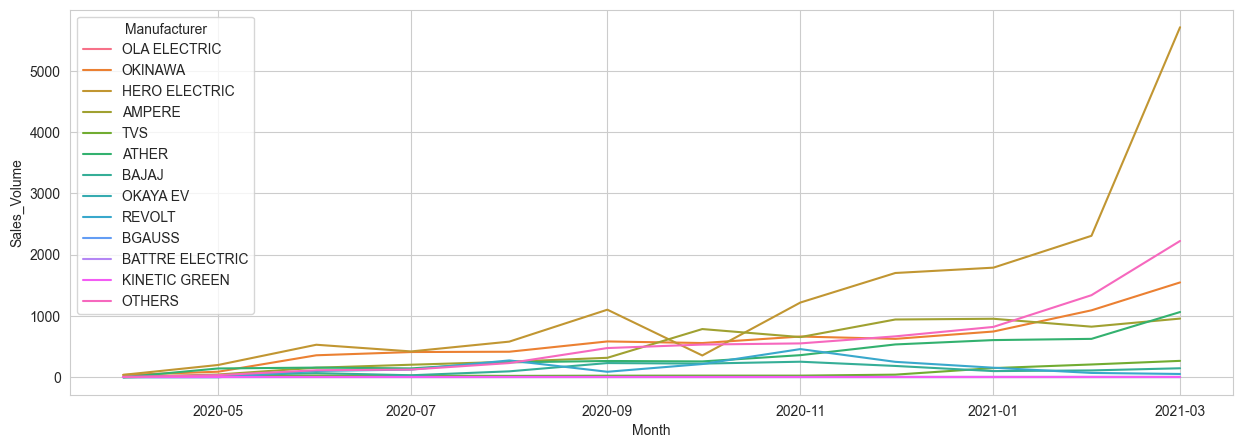

In [89]:
#shows the different brands sales trends in FY2020_2021
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Sales_Volume',hue='Manufacturer',data=df7)
plt.show()

From this graph shows maximum sales done by Hero Elecctric two wheeler in the year of 2020to 2021

In [90]:
# load the India EV 2W Sales Data set on FY2021_2022
df8=pd.read_excel('D:/Downloads/India EV 2W Sales Data.xlsx',sheet_name='FY2021_2022')

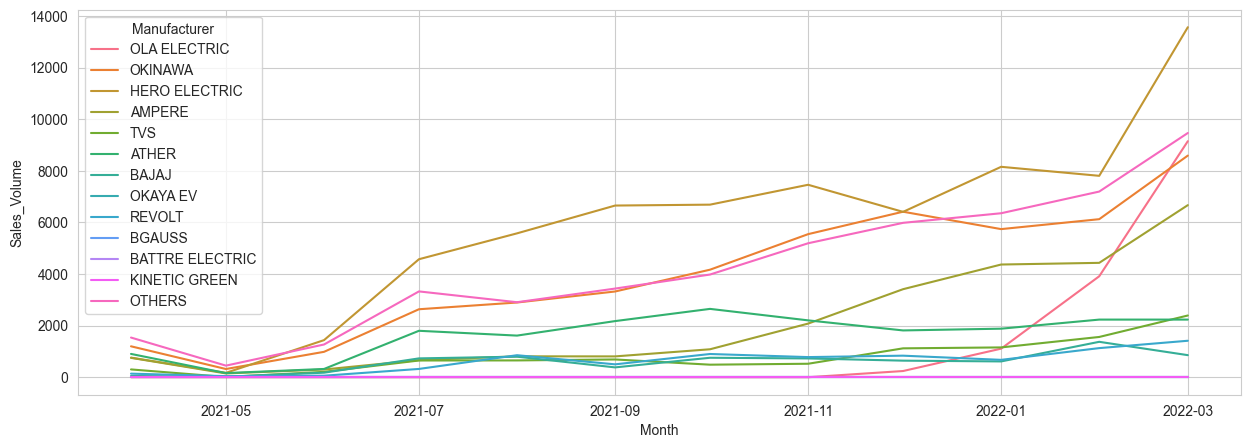

In [91]:
#shows the different brands sales trends in FY2021_2022
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Sales_Volume',hue='Manufacturer',data=df8)
plt.show()

From this graph shows maximum sales done by Hero Elecctric two wheeler in the year of 2021 to 2022

In [92]:
# load the India EV 2W Sales Data set on FY2022_2023
df9=pd.read_excel('D:/Downloads/India EV 2W Sales Data.xlsx',sheet_name='FY2022_2023')

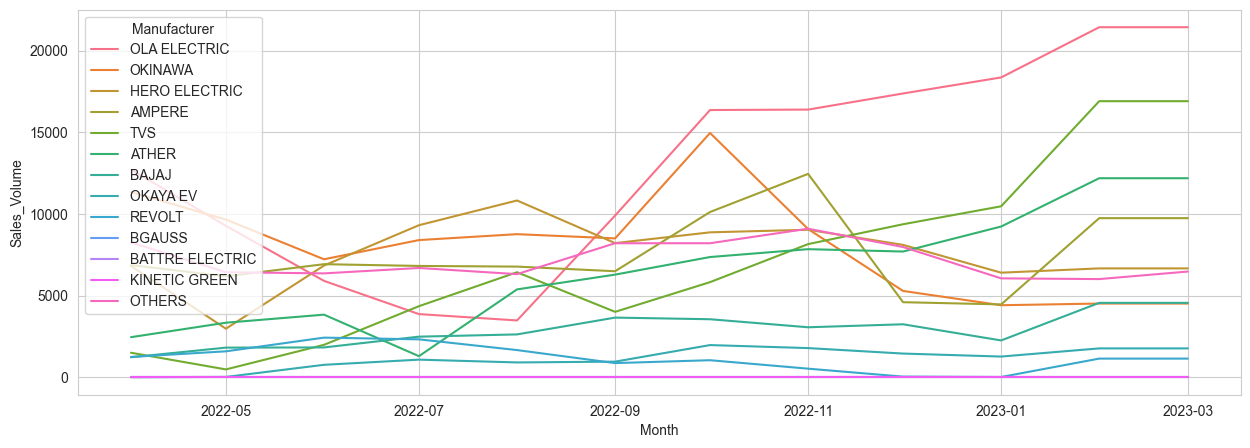

In [93]:
#shows the different brands sales trends in FY2022_2023
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Sales_Volume',hue='Manufacturer',data=df9)
plt.show()

From this graph shows maximum sales done by Ola electric two wheeler in the year of 2022 to 2023

In [94]:
# load the India EV 2W Sales Data set on FY2023_2024
df10=pd.read_excel('D:/Downloads/India EV 2W Sales Data.xlsx',sheet_name='FY2023_2024')

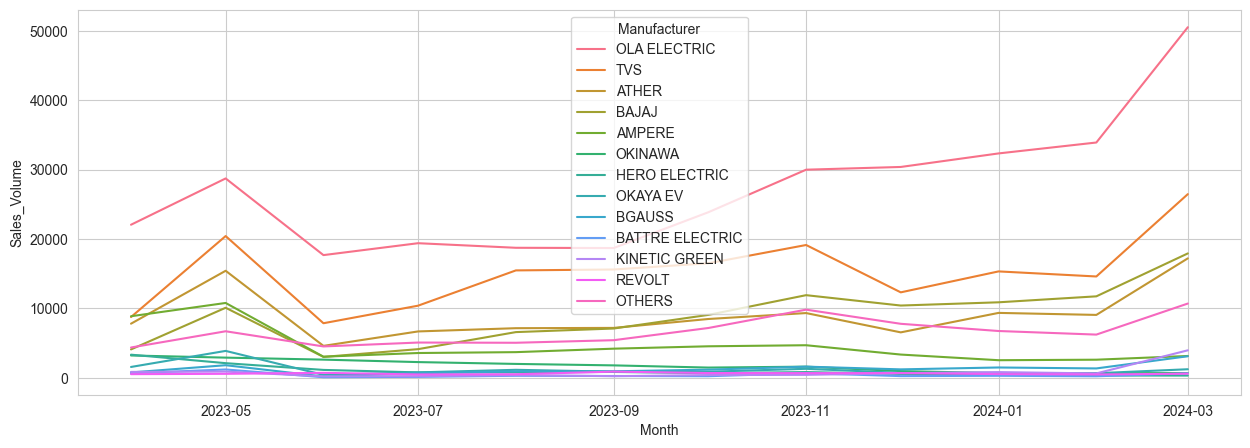

In [95]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Sales_Volume',hue='Manufacturer',data=df10)
plt.show()

From this graph shows maximum sales done by Ola Elecctric two wheeler in the year of 2023 to 2024

### Customer reviews on Four wheeler dataset

In [96]:
# load the customers reviews on ev cars dataset
df11=pd.read_csv('D:/Downloads/archive (11)/4-wheeler-EV-carwale.csv')
df11

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona
...,...,...,...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,New,Did a short drive once,4.0,tata tigor ev
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,Not Purchased,Haven't driven it,5.0,tata tigor ev


In [97]:
# basic information
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [98]:
# differenticiate the features based on the datatype
continuous_features=[]
for i in df11.columns:
    if df11[i].dtypes=='float64':
        continuous_features.append(i)
print('continuous features: ',continuous_features)

continuous features:  ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']


In [99]:
# value counts by features
for i in continuous_features:
    print('\n',f'======== {i} =======')
    print('total: ',len(df11))
    print(df11[i].value_counts())


 ======== Exterior =======
total:  129
Exterior
5.0    86
4.0    30
3.0     7
1.0     4
0.0     1
2.0     1
Name: count, dtype: int64

 ======== Comfort =======
total:  129
Comfort
5.0    85
4.0    28
3.0     7
1.0     4
2.0     4
0.0     1
Name: count, dtype: int64

 ======== Performance =======
total:  129
Performance
5.0    93
4.0    17
3.0     8
1.0     7
2.0     3
0.0     1
Name: count, dtype: int64

 ======== Fuel Economy =======
total:  129
Fuel Economy
5.0    91
4.0    19
3.0    10
1.0     7
0.0     1
2.0     1
Name: count, dtype: int64

 ======== Value for Money =======
total:  129
Value for Money
5.0    84
4.0    14
2.0    11
3.0    10
1.0     9
0.0     1
Name: count, dtype: int64

 ======== rating =======
total:  129
rating
5.0    95
4.0    14
0.0     9
3.0     7
2.0     4
Name: count, dtype: int64


In [100]:
df11['Condition'].value_counts()

Condition
New              63
Not Purchased    46
Used             20
Name: count, dtype: int64

In [101]:
# check the null values
df11.isnull().sum()

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [102]:
# check the duplicated records
df11.duplicated().sum()

0

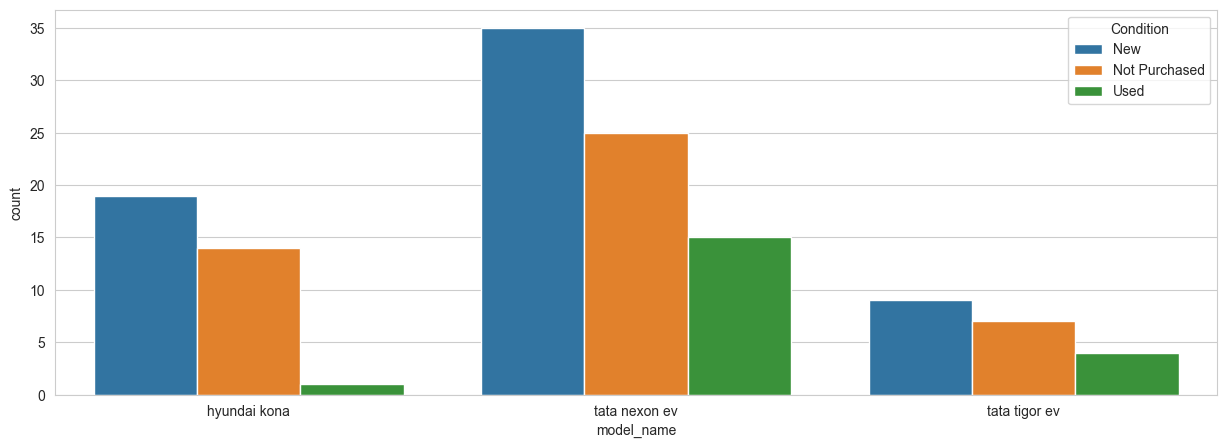

In [103]:
# customer either purchased the vehicle or not by model
plt.figure(figsize=(15,5))
sns.countplot(x='model_name',hue='Condition',data=df11)
plt.show()

This Graph delved most of the customer are purchased tata nexon ev car and least customers purchased tata tigor ev car

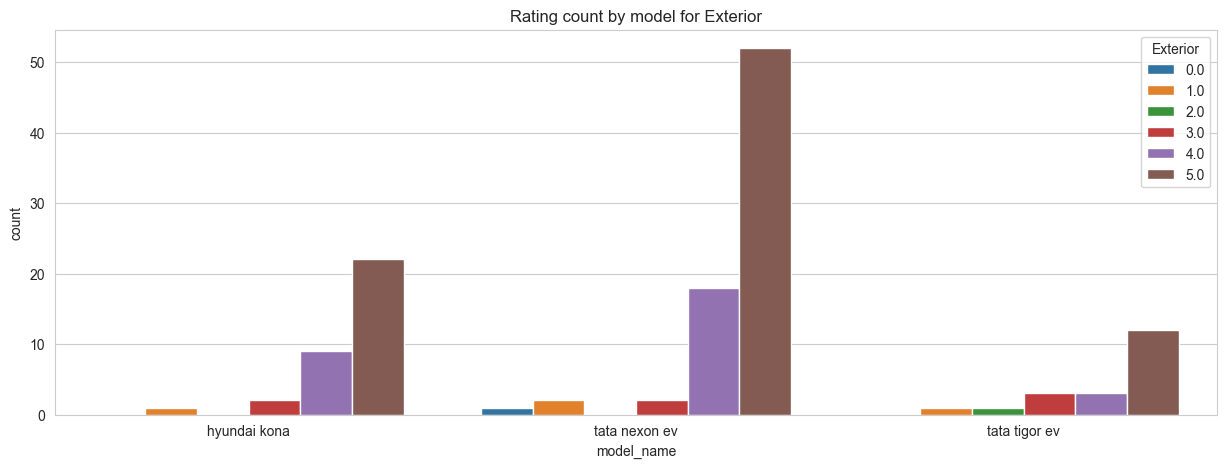

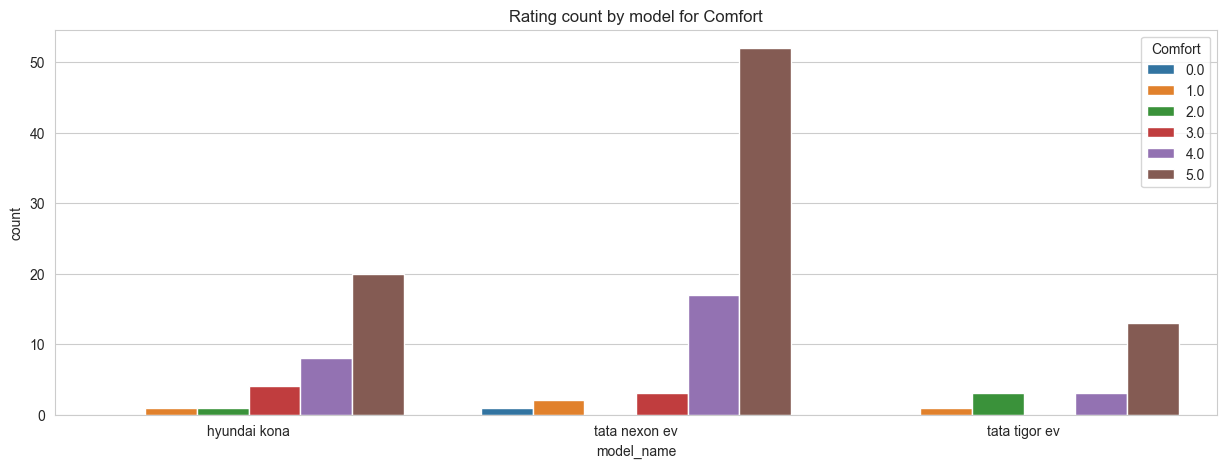

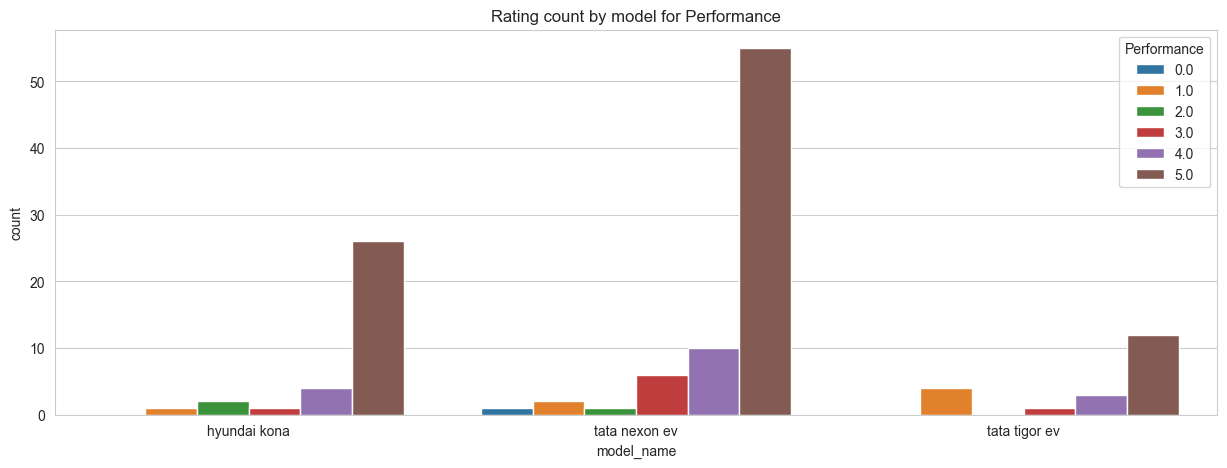

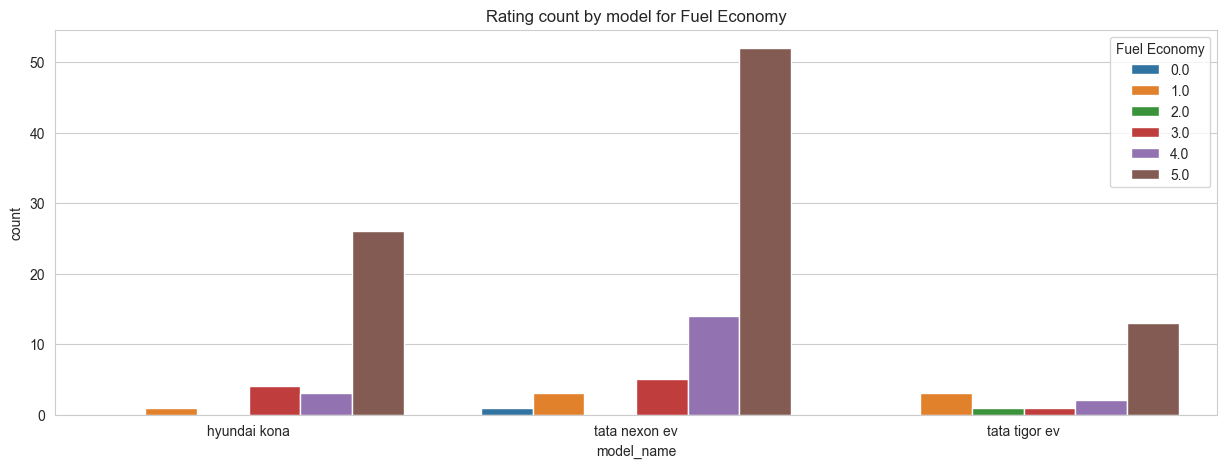

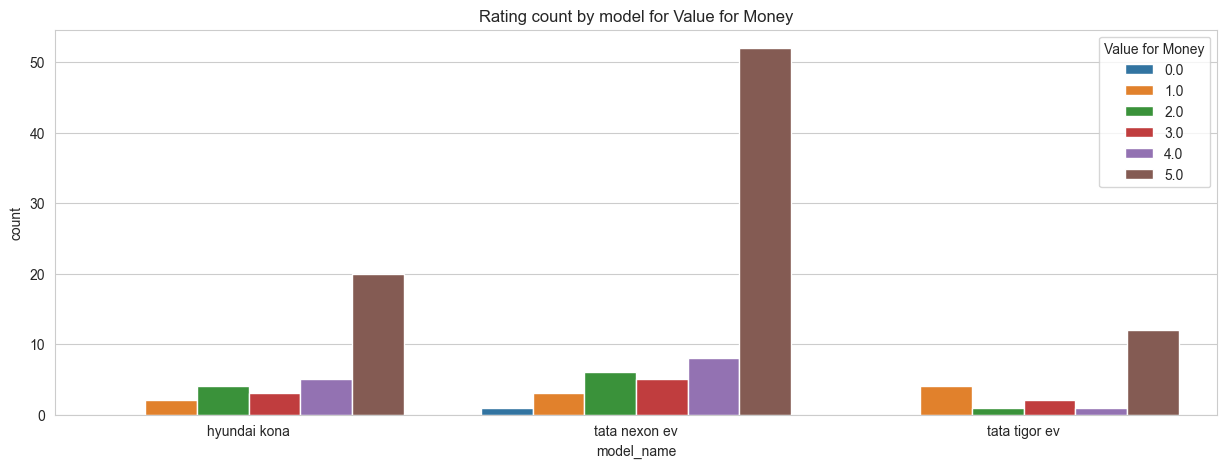

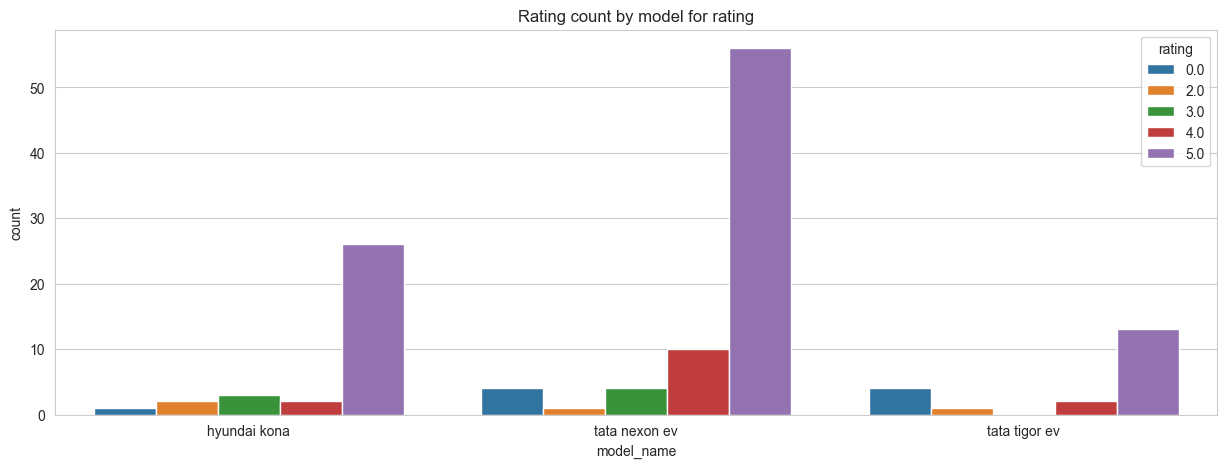

In [104]:
# customer rating on different specifications of car
for i in continuous_features:
    plt.figure(figsize=(15,5))
    sns.countplot(hue=df11[i],x=df11['model_name'])
    plt.title(f'Rating count by model for {i}')
    plt.show()

This is the customers rating on the car specifications most of the customers liked tata nexon for Exterior, Performance, Comfort, Fuel economy and Value for money

### Customer reviews on Two wheeler dataset

In [105]:
# load the customers reviews on ev two wheelers dataset
df12=pd.read_csv('D:/Downloads/archive (11)/2-wheeler-EV-bikewale.csv')
df12 

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [106]:
# check the basic information
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [107]:
# check the columns
df12.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')

In [108]:
# differenticiate the features based on the datatype
continuous_features=[]
for i in df12.columns:
    if df12[i].dtypes=='float64':
        continuous_features.append(i)
print('continuous features: ',continuous_features)

continuous features:  ['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money']


In [109]:
# value counts by features
for i in continuous_features:
    print('\n',f'======== {i} =======')
    print('total: ',len(df12))
    print(df12[i].value_counts())


 ======== Visual Appeal =======
total:  844
Visual Appeal
5.0    297
4.0    203
3.0    109
1.0     91
2.0     39
Name: count, dtype: int64

 ======== Reliability =======
total:  844
Reliability
5.0    237
1.0    177
4.0    158
3.0     91
2.0     53
Name: count, dtype: int64

 ======== Performance =======
total:  844
Performance
5.0    126
4.0     85
1.0     67
3.0     46
2.0     21
Name: count, dtype: int64

 ======== Service Experience =======
total:  844
Service Experience
5.0    217
1.0    211
4.0    138
3.0     89
2.0     48
Name: count, dtype: int64

 ======== Extra Features =======
total:  844
Extra Features
1.0    60
5.0    47
4.0    38
2.0    24
3.0    16
Name: count, dtype: int64

 ======== Comfort =======
total:  844
Comfort
5.0    189
4.0    161
1.0     74
3.0     67
2.0     39
Name: count, dtype: int64

 ======== Maintenance cost =======
total:  844
Maintenance cost
4.0    77
5.0    38
1.0    32
2.0    18
3.0    15
Name: count, dtype: int64

 ======== Value for Money =====

In [110]:
# check the null values
df12.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [111]:
# drop the columns which is having highest null values
df12.drop(columns=['Performance','Extra Features','Maintenance cost','Value for Money'],inplace=True)

In [112]:
# drop the null values
df12.dropna(inplace=True)

In [113]:
# check the duplicated records
df12.duplicated().sum()

0

In [114]:
# Unique models
df12['Model Name'].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere REO', 'Odysse Evoqis', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'Joy e-bike Wolf', 'Techo Electra Emerge', 'Techo Electra Raptor',
       'e-bike Gen Nxt', 'Gemopai Ryder'], dtype=object)

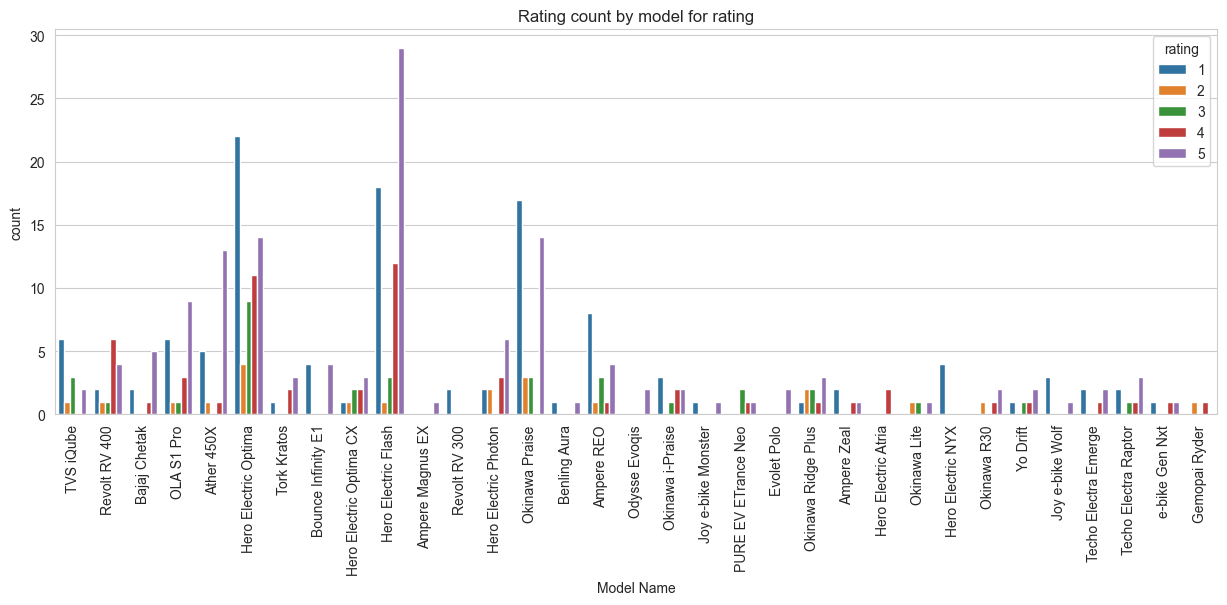

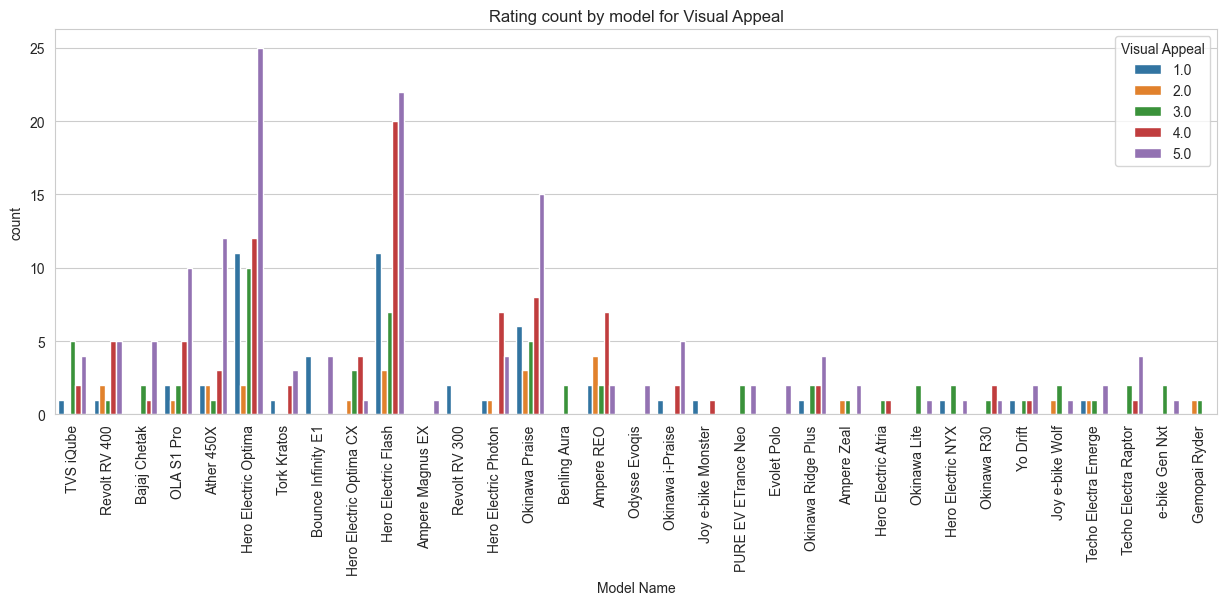

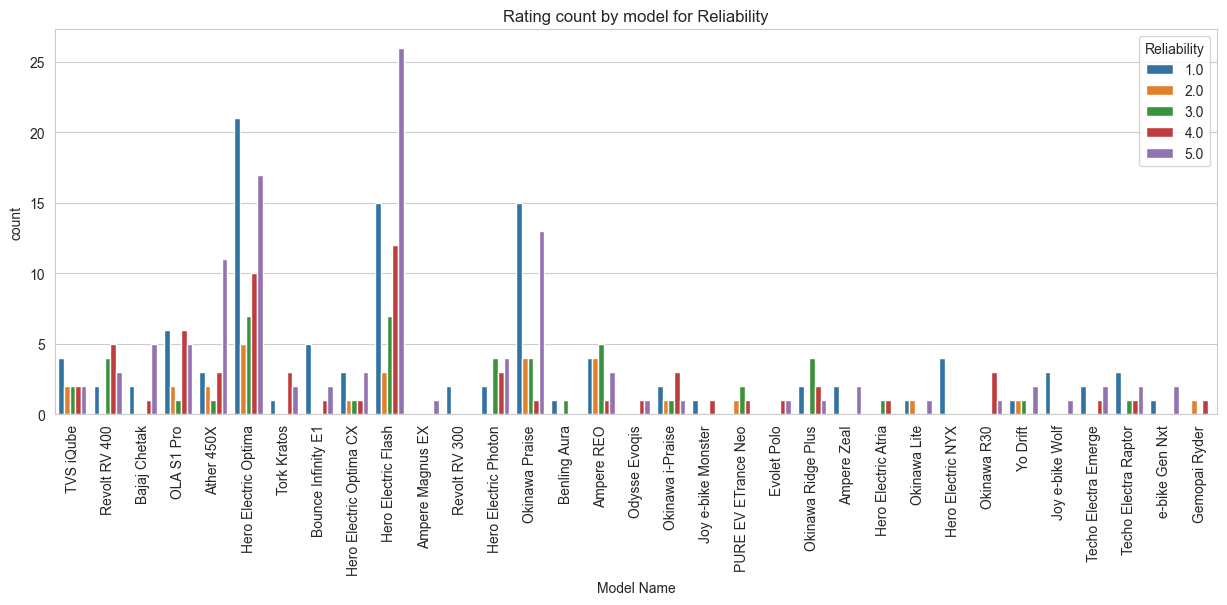

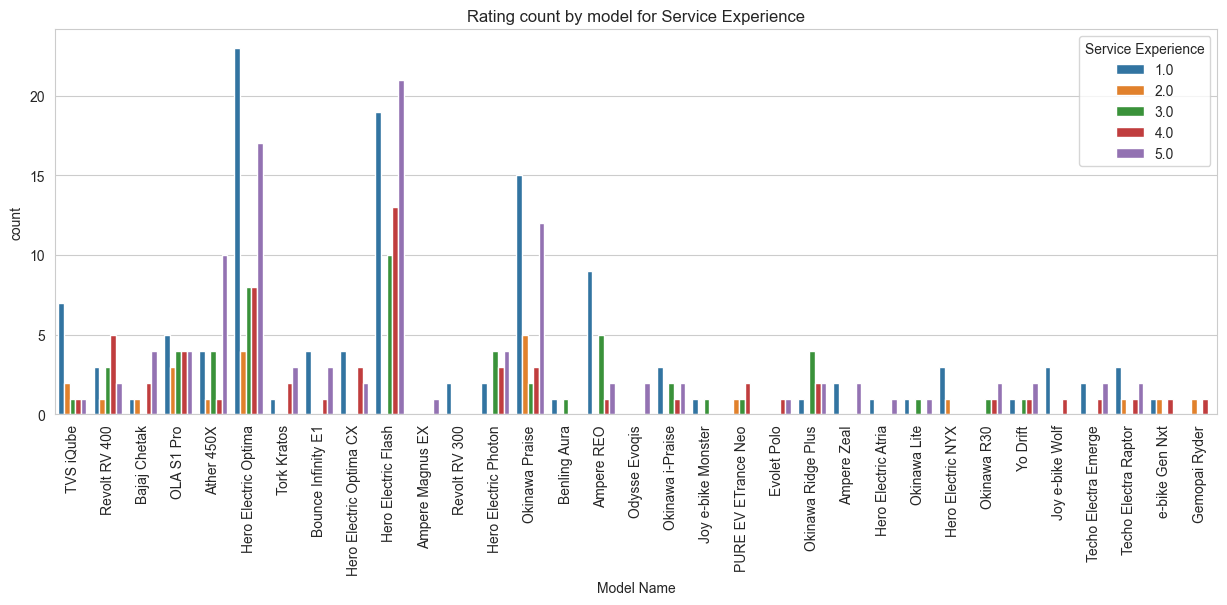

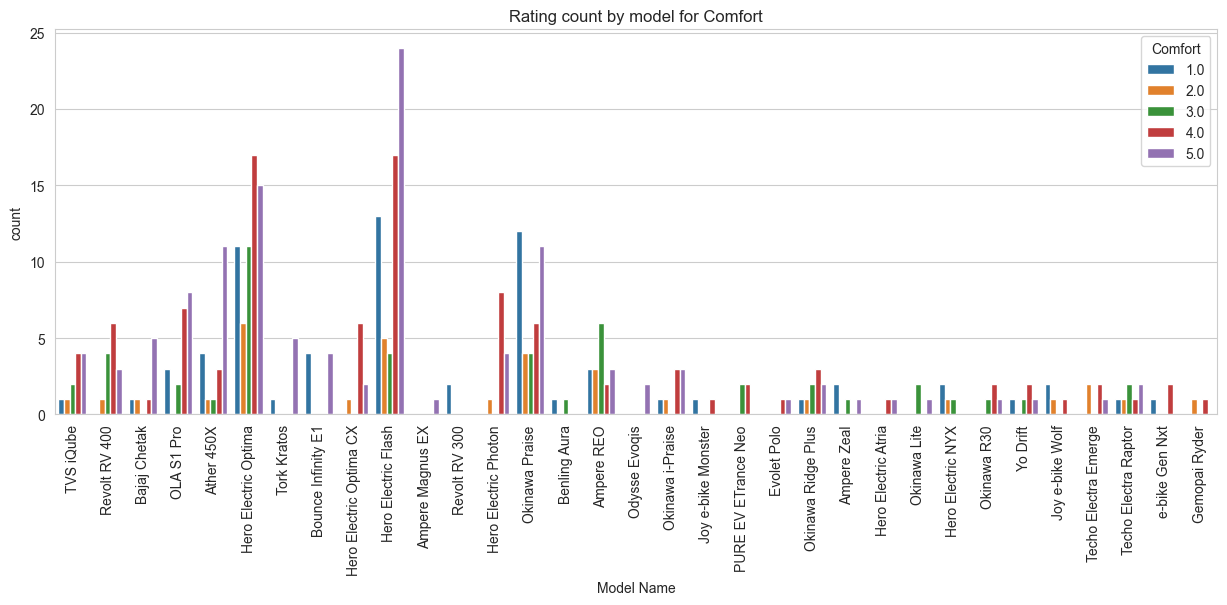

In [115]:
# customer rating on different specifications of car
for i in df12.columns:
    if df12[i].dtypes=='float64' or df12[i].dtypes=='int64':
        plt.figure(figsize=(15,5))
        sns.countplot(hue=df12[i],x=df12['Model Name'])
        plt.title(f'Rating count by model for {i}')
        plt.xticks(rotation=90)
        plt.show()

In [116]:
# values count
df12['Used it for'].value_counts()

Used it for
Daily Commute         267
Everything             57
Occasional Commute     30
Leisure Rides           7
Tours                   1
Name: count, dtype: int64

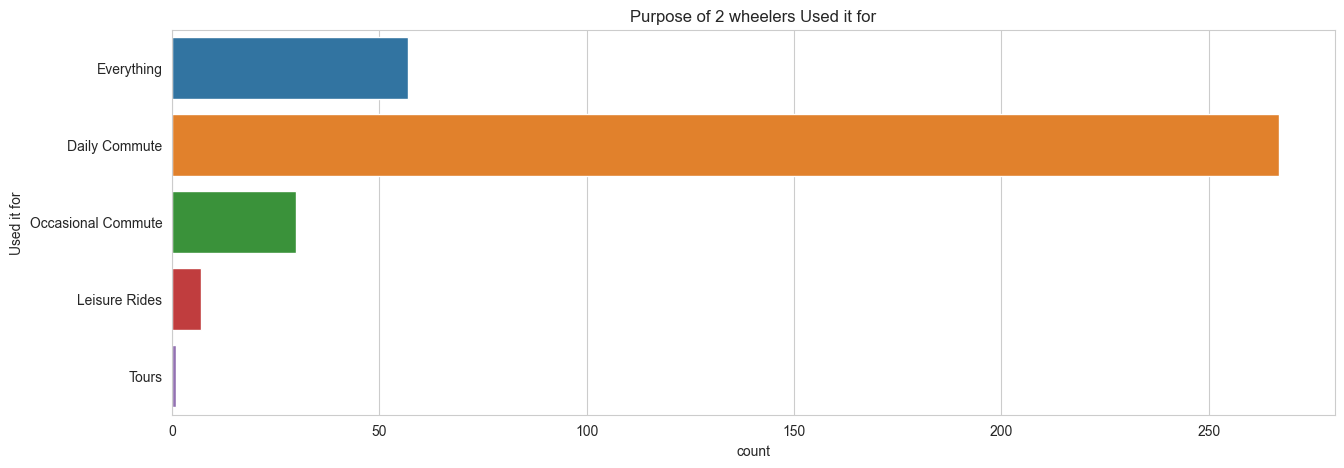

In [155]:
# plot the results used the two wheelers for
plt.figure(figsize=(15,5))
sns.countplot(y=df12['Used it for'])
plt.title('Purpose of 2 wheelers Used it for')
plt.show()

This graph showcased the customers buying the two wheeler veehicles for daily commute

In [118]:
df12['Owned for'].value_counts()

Owned for
> 1 yr           114
< 3 months        98
6 months-1 yr     83
3-6 months        67
Name: count, dtype: int64

# Price range by car
plt.figure(figsize=(25,10))
sns.countplot(x='Owned for',hue='Model Name',data=df12)
plt.title('Price Range by Car brand')
plt.show()

From this graph customers interested to buy a two wheeler for using more than one year

### Electric vehicles in India sataset

In [120]:
# load the EV India dataset 
df13=pd.read_csv('D:/Downloads/EVIndia.csv')
df13

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


In [121]:
# basic information
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [122]:
# check the null values
df13.isnull().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

In [123]:
# check the duplicated values
df13.duplicated().sum()

0

In [124]:
# grouping the list of cars
cars=list(df13['Car'].values)

In [125]:
cars

['Tata Nexon EV',
 'Tata Tigor EV',
 'Tata Nexon EV Max',
 'MG ZS EV',
 'Hyundai Kona Electric',
 'Jaguar I-Pace',
 'Audi E-Tron GT',
 'BYD E6',
 'Mercedes-Benz EQC',
 'BMW iX',
 'Porsche Taycan',
 'Audi E-Tron']

In [126]:
# adding the list of cars and milage range using zip function
ranges=list(df13['Range'].values)
range=[int(range_values.split(" ")[0]) if range_values !='na' else 0 for range_values in ranges]
jip=zip(cars,range)

In [127]:
# make a dataframe of cars and ranges
data=pd.DataFrame(jip,columns=['cars','range'])

In [128]:
data

,cars,range
0,Tata Nexon EV,312
1,Tata Tigor EV,306
2,Tata Nexon EV Max,437
3,MG ZS EV,419
4,Hyundai Kona Electric,452
5,Jaguar I-Pace,470
6,Audi E-Tron GT,388
7,BYD E6,415
8,Mercedes-Benz EQC,471
9,BMW iX,425


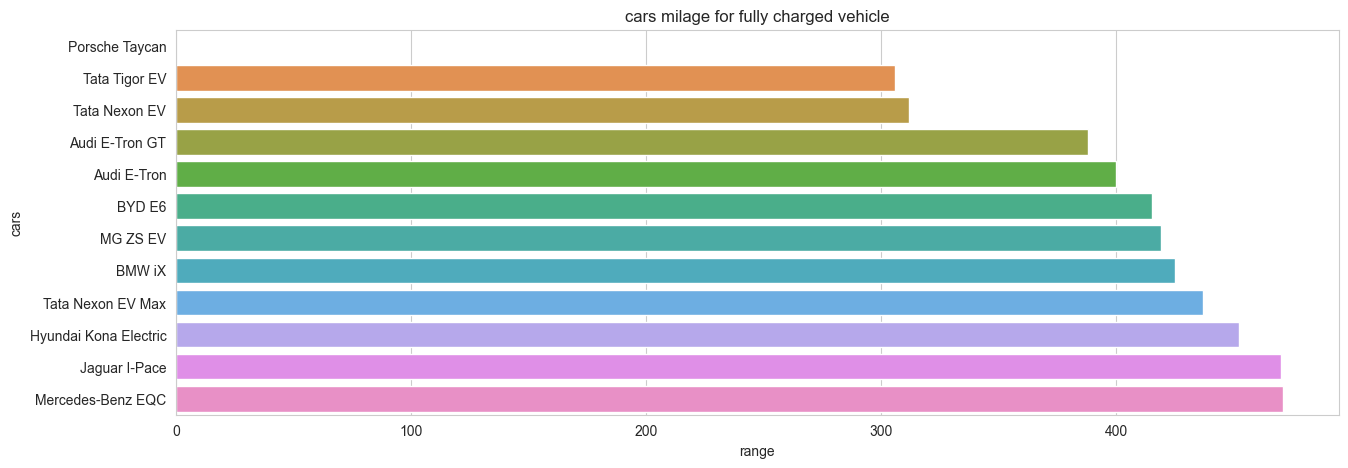

In [129]:
# car brands with their milage range if fully charged
plot=data.sort_values(by='range',ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(y='cars',x='range',data=plot)
plt.title('cars milage for fully charged vehicle')
plt.show()

 This graph showcased Customer  Jaguar I-Pace and Mercedes-Benz EQC gives you the highst mailage

In [130]:
# adding the list of cars and their boot space using zip function
boot=list(df13['BootSpace'].values)
boot_space=[int(range_values.split(" ")[0]) if range_values !='na' else 0 for range_values in boot]
jip=zip(cars,boot_space)

In [131]:
# make a datafram for cars with their bootspace
data1=pd.DataFrame(jip,columns=['cars','boot_space'])

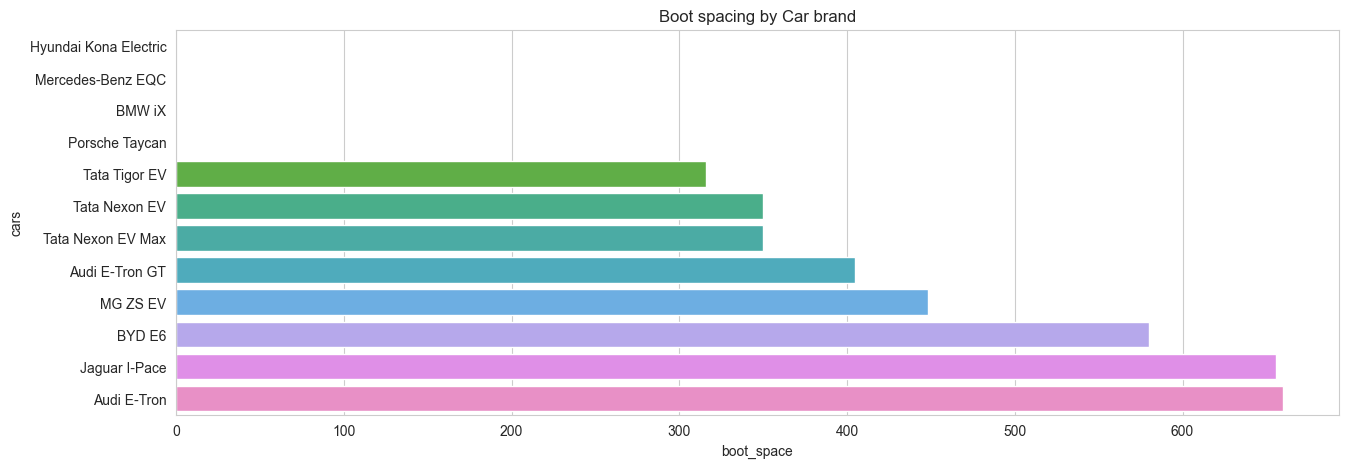

In [156]:
# car brand with their boot space 
plot=data1.sort_values(by='boot_space',ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(y='cars',x='boot_space',data=plot)
plt.title('Boot spacing by Car brand')
plt.show()

This graph showcased Customer Jaguar I-Pace and Audi E Tron having the maximun boot space

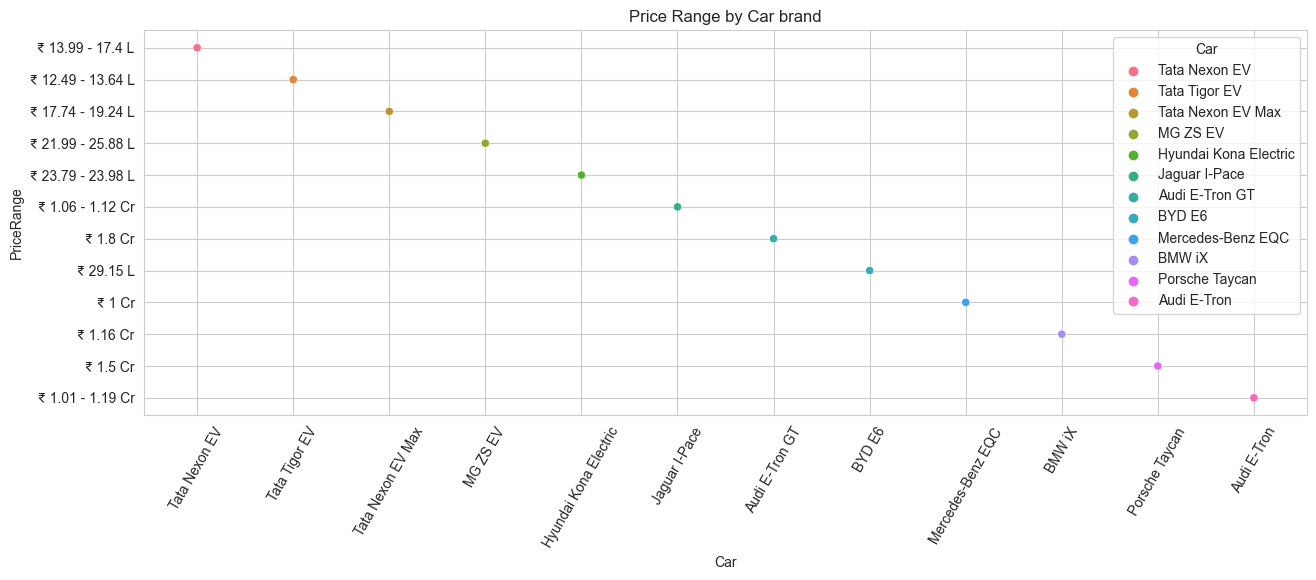

In [133]:
# Price range by car
plt.figure(figsize=(15,5))
sns.scatterplot(x='Car',y='PriceRange',hue='Car',data=df13)
plt.xticks(rotation=60)
plt.title('Price Range by Car brand')
plt.show()

### Conclusion

According to Demographic, Geographic and Technographic Data we can conclude as states like Maharashtra, Karnataka and UP has scope when it comes to geography. Highways associated to likes of Nagpur, Delhi, Mumbai has most number of EV charging stations with Maharashtra leading the stats. Some interesting outcomes says that 85% car owners are married and also 2/3rd were dependent on loan. Age group of 25-40 were most demanded one and hence most targeted as well. People from age group 25-31 with no of dependants > 2 and salary between 13 lakhs and 17 lakhs are buying cars.

In this way with help of dataset we can generate insights and determine how to tackle market segment and target it with careful and improved strategy.